<span style="color:red">
    <h1> Spotify Genre Analysis </h1>
</span>

<span style="color:blue">
<h2> Names: Zilong Liu and Qirong He </h2>
</span>

<p>The datasets we used are Spotify and Pitchfork Review Datasets. In the Spotify datasets, there are three CSV files, including acoustic_features.csv, albums.csv and reviews.csv. </p>
<p>By applying exploratory data analysis, we aimed at finding out answers to the following research questions: (1) What genre do people prefer compared with others? (2) Can we use PCA to classify songs of different genres? (3) How can we predict the genre of a song based on its audio features? (4) Can we use the music reviews to achieve music recommendation? </p>

# Reading Songs, Albums and Reviews Datasets

## Loading necessary modules

In [1]:
# Used for reading datasets and basic data manipulation
import pandas as pd
import numpy as np

# Used for visualization
import seaborn as sns
import plotly.plotly as py
import matplotlib.pyplot as plt

# Used for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Used for logistic Regressions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

# Used for regular expressions
import re
import string

# Used for tokenization, lemmatization and sentiment analysis
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import pos_tag
from nltk import FreqDist
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.similarities import MatrixSimilarity

## Reading and Droping NaN

df_reviews, df_albums and df_songs are used to store reviews, albums and songs datasets.

In [2]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews = df_reviews.dropna()
df_reviews = df_reviews.drop(columns = ['index','id','link','bnm'])
df_reviews.head()

artist                                       album       genre  \
0       David Byrne  “…The Best Live Show of All Time” — NME EP        Rock   
1         DJ Healer           Lost Lovesongs / Lostsongs Vol. 2  Electronic   
2       Jorge Velez                                 Roman Birds  Electronic   
3           Chandra                          Transportation EPs        Rock   
4  The Chainsmokers                                    Sick Boy  Electronic   

   score             date             author                 role  \
0    5.5  January 11 2019          Andy Beta          Contributor   
1    6.2  January 11 2019        Chal Ravens          Contributor   
2    7.9  January 10 2019   Philip Sherburne  Contributing Editor   
3    7.8  January 10 2019          Andy Beta          Contributor   
4    3.1   January 9 2019  Larry Fitzmaurice          Contributor   

                                              review  
0  Viva Brother, Terris, Mansun, the Twang, Joe L...  
1  The Prince of Denmark—that is, the proper prin...  
2  Jorge Velez has long been prolific, but that’s...  
3  When the Avalanches returned in 2016 after an ...  
4  We’re going to be stuck with the Chainsmokers ...

In [3]:
df_songs = pd.read_csv('acoustic_features.csv')
df_songs = df_songs.dropna()
df_songs = df_songs.drop(columns = ['index','id','album_id'])
df_songs.head()

song       album                  artist  \
0                   Voices In My Head  Hoodie SZN  A Boogie Wit da Hoodie   
1                              Beasty  Hoodie SZN  A Boogie Wit da Hoodie   
2                            I Did It  Hoodie SZN  A Boogie Wit da Hoodie   
3             Swervin (feat. 6ix9ine)  Hoodie SZN  A Boogie Wit da Hoodie   
4  Startender (feat. Offset and Tyga)  Hoodie SZN  A Boogie Wit da Hoodie   

   acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0555         0.754     142301.0   0.663          0.000000  6.0   
1        0.2920         0.860     152829.0   0.418          0.000000  7.0   
2        0.1530         0.718     215305.0   0.454          0.000046  8.0   
3        0.0153         0.581     189487.0   0.662          0.000000  9.0   
4        0.0235         0.736     192779.0   0.622          0.000000  6.0   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0     0.101    -6.311   0.0        0.427   90.195             4.0    0.207   
1     0.106    -9.061   0.0        0.158  126.023             4.0    0.374   
2     0.116    -9.012   1.0        0.127   89.483             4.0    0.196   
3     0.111    -5.239   1.0        0.303   93.023             4.0    0.434   
4     0.151    -4.653   0.0        0.133  191.971             4.0    0.506   

         date  
0  2018-12-21  
1  2018-12-21  
2  2018-12-21  
3  2018-12-21  
4  2018-12-21

In [4]:
df_albums = pd.read_csv('albums.csv')
df_albums = df_albums.drop(columns = ['index','id','artist'])
df_albums = df_albums.dropna()
df_albums.head()

date                              album  rank  length   track_length
1  2019-01-19                         Hoodie SZN   1.0    20.0  185233.800000
2  2019-01-19                       I Am > I Was   2.0    15.0  211050.733333
3  2019-01-19  Spider-Man: Into The Spider-Verse   3.0    13.0  190866.384615
4  2019-01-19                      Championships   4.0    19.0  219173.894737
5  2019-01-19               beerbongs & bentleys   5.0    18.0  214113.611111

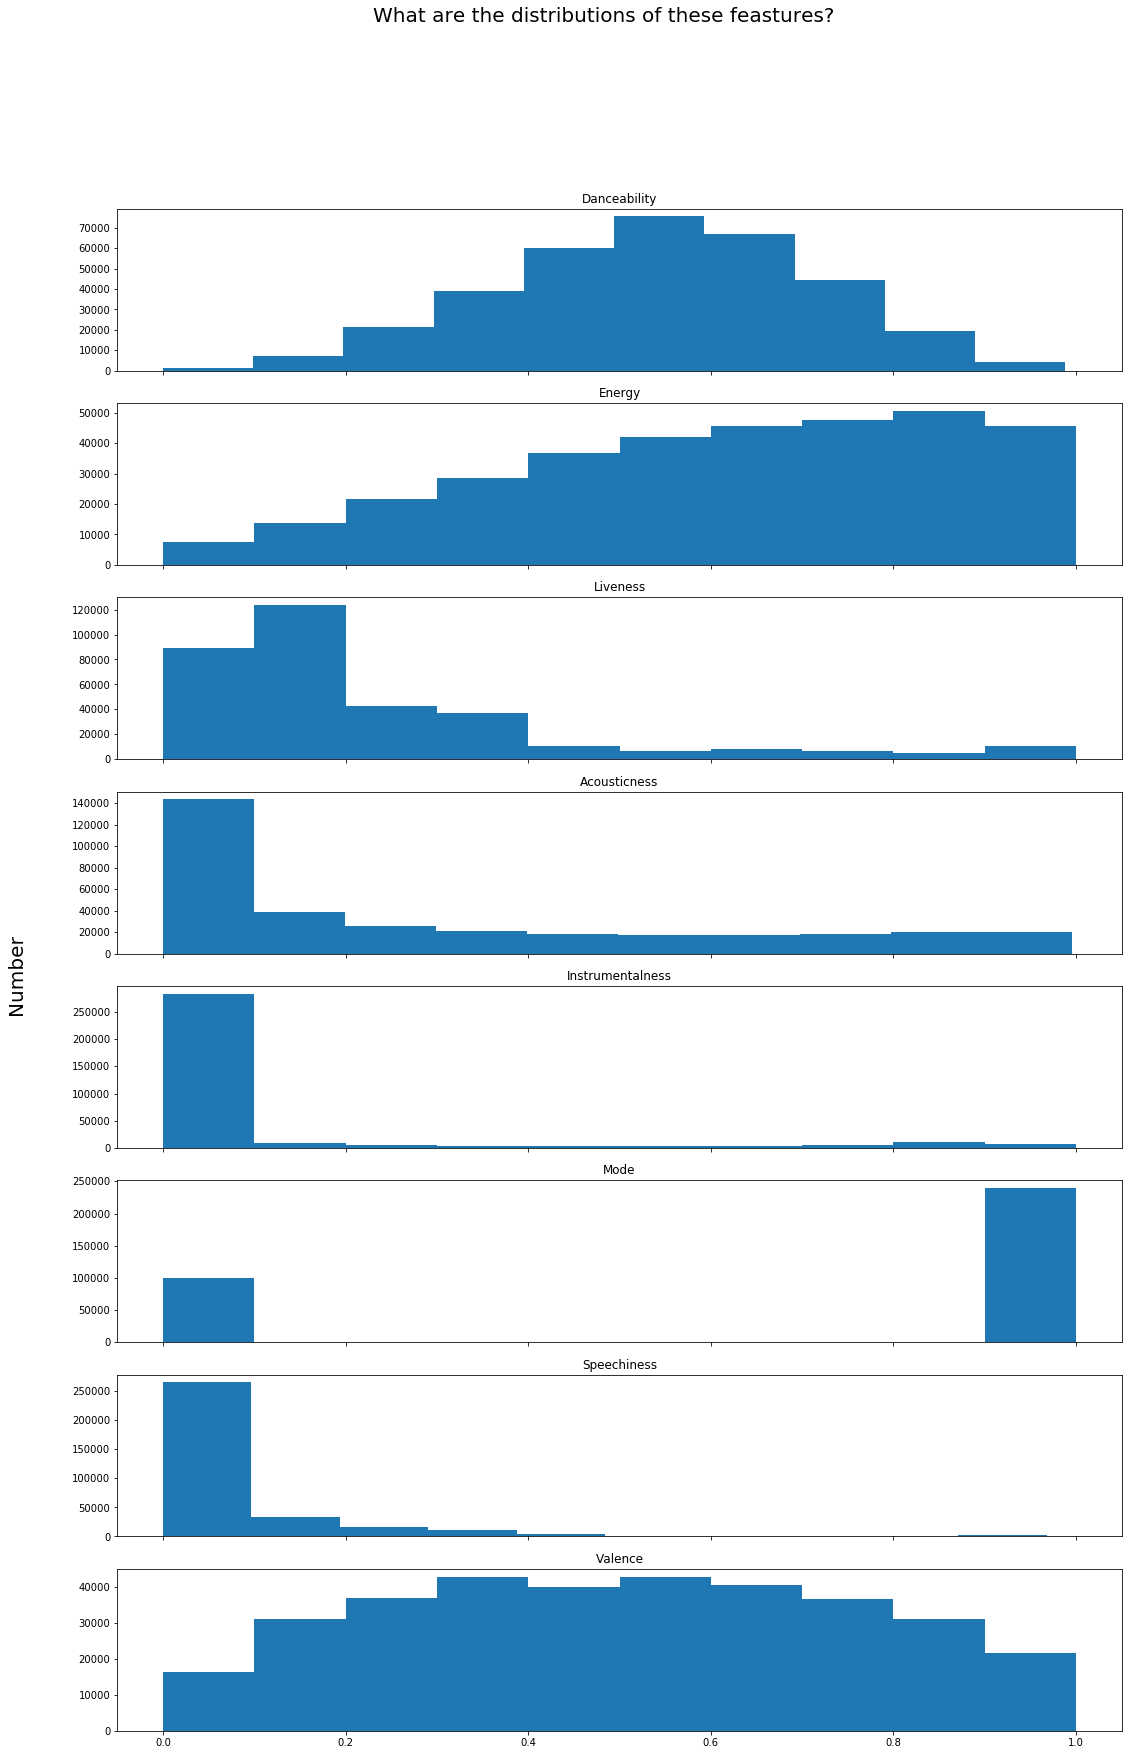

In [5]:
fig, axs = plt.subplots(8, 1, figsize=(18, 28), sharex=True)
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical',size=20)
axs[0].hist(df_songs['danceability'])
axs[0].set_title('Danceability')
axs[1].hist(df_songs['energy'])
axs[1].set_title('Energy')
axs[2].hist(df_songs['liveness'])
axs[2].set_title('Liveness')
axs[3].hist(df_songs['acousticness'])
axs[3].set_title('Acousticness')
axs[4].hist(df_songs['instrumentalness'])
axs[4].set_title('Instrumentalness')
axs[5].hist(df_songs['mode'])
axs[5].set_title('Mode')
axs[6].hist(df_songs['speechiness'])
axs[6].set_title('Speechiness')
axs[7].hist(df_songs['valence'])
axs[7].set_title('Valence')

fig.suptitle('What are the distributions of these feastures?',size=20)
plt.show()

# Users' Preferences for Different Genres

## What kinds of genres are included in our datasets?

There are 126 genres included in our datasets. 

In [6]:
genres = df_reviews['genre'].unique()
print(len(genres))
genres[:]

126


array(['Rock', 'Electronic', 'Rap', 'Experimental', 'Pop/R&B',
       'Folk/Country', 'Metal', 'Rock,Pop/R&B', 'Jazz',
       'Rock,Experimental', 'Metal,Rock', 'Jazz,Experimental',
       'Experimental,Electronic', 'Folk/Country,Experimental',
       'Experimental,Rock', 'Global', 'Pop/R&B,Electronic',
       'Electronic,Rock', 'Pop/R&B,Rap', 'Pop/R&B,Folk/Country',
       'Electronic,Metal', 'Electronic,Pop/R&B',
       'Electronic,Experimental', 'Pop/R&B,Rock',
       'Electronic,Experimental,Folk/Country', 'Pop/R&B,Global',
       'Rock,Folk/Country', 'Pop/R&B,Experimental', 'Global,Pop/R&B',
       'Experimental,Global', 'Electronic,Experimental,Global,Rock',
       'Experimental,Rap', 'Rock,Jazz', 'Rap,Pop/R&B', 'Rap,Rock',
       'Experimental,Rap,Rock', 'Global,Jazz', 'Jazz,Pop/R&B',
       'Rock,Electronic', 'Experimental,Metal', 'Rap,Electronic',
       'Electronic,Experimental,Rock', 'Rock,Metal', 'Jazz,Global',
       'Experimental,Folk/Country', 'Experimental,Jazz',
      

By merging df_songs and df_reviews, we can get a glimpse at how many songs of different genres are in our datasets.

In [7]:
df_songs = df_songs.merge(df_reviews,on='album')
df_songs = df_songs.rename(columns={"date_x": "date_song", "date_y": "date_review"})
df_songs = df_songs.dropna()
df_songs.head()

song       album                artist_x  \
0                   Voices In My Head  Hoodie SZN  A Boogie Wit da Hoodie   
1                              Beasty  Hoodie SZN  A Boogie Wit da Hoodie   
2                            I Did It  Hoodie SZN  A Boogie Wit da Hoodie   
3             Swervin (feat. 6ix9ine)  Hoodie SZN  A Boogie Wit da Hoodie   
4  Startender (feat. Offset and Tyga)  Hoodie SZN  A Boogie Wit da Hoodie   

   acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0555         0.754     142301.0   0.663          0.000000  6.0   
1        0.2920         0.860     152829.0   0.418          0.000000  7.0   
2        0.1530         0.718     215305.0   0.454          0.000046  8.0   
3        0.0153         0.581     189487.0   0.662          0.000000  9.0   
4        0.0235         0.736     192779.0   0.622          0.000000  6.0   

   liveness  ...  time_signature  valence   date_song                artist_y  \
0     0.101  ...             4.0    0.207  2018-12-21  A Boogie Wit Da Hoodie   
1     0.106  ...             4.0    0.374  2018-12-21  A Boogie Wit Da Hoodie   
2     0.116  ...             4.0    0.196  2018-12-21  A Boogie Wit Da Hoodie   
3     0.111  ...             4.0    0.434  2018-12-21  A Boogie Wit Da Hoodie   
4     0.151  ...             4.0    0.506  2018-12-21  A Boogie Wit Da Hoodie   

   genre  score     date_review           author           role  \
0    Rap    6.8  January 8 2019  Alphonse Pierre  Staff Writer    
1    Rap    6.8  January 8 2019  Alphonse Pierre  Staff Writer    
2    Rap    6.8  January 8 2019  Alphonse Pierre  Staff Writer    
3    Rap    6.8  January 8 2019  Alphonse Pierre  Staff Writer    
4    Rap    6.8  January 8 2019  Alphonse Pierre  Staff Writer    

                                              review  
0  In New York, time moves at its own pace: Faceb...  
1  In New York, time moves at its own pace: Faceb...  
2  In New York, time moves at its own pace: Faceb...  
3  In New York, time moves at its own pace: Faceb...  
4  In New York, time moves at its own pace: Faceb...  

[5 rows x 24 columns]

In [8]:
df_songs['genre'].value_counts().to_dict()

{'Rock': 14776,
 'Rap': 7319,
 'Pop/R&B': 4187,
 'Electronic': 3740,
 'Electronic,Rock': 1630,
 'Folk/Country': 1043,
 'Experimental': 937,
 'Experimental,Rock': 878,
 'Metal': 678,
 'Metal,Rock': 457,
 'Electronic,Pop/R&B': 448,
 'Pop/R&B,Rap': 326,
 'Jazz': 245,
 'Rap,Rock': 150,
 'Pop/R&B,Rock': 141,
 'Global,Pop/R&B': 97,
 'Jazz,Pop/R&B': 92,
 'Global': 79,
 'Electronic,Rap': 77,
 'Electronic,Jazz': 59,
 'Electronic,Experimental,Rock': 58,
 'Rap,Pop/R&B': 56,
 'Electronic,Experimental': 48,
 'Experimental,Jazz': 45,
 'Electronic,Metal,Rock': 36,
 'Electronic,Folk/Country': 30,
 'Jazz,Rock': 29,
 'Folk/Country,Rock': 27,
 'Metal,Pop/R&B,Rap': 27,
 'Experimental,Rap': 26,
 'Experimental,Metal,Rock': 23,
 'Rock,Electronic': 22,
 'Electronic,Pop/R&B,Rap': 21,
 'Global,Rock': 21,
 'Jazz,Metal': 20,
 'Folk/Country,Electronic,Experimental': 17,
 'Experimental,Electronic,Rock': 17,
 'Rock,Pop/R&B': 16,
 'Rap,Experimental': 15,
 'Rock,Experimental': 15,
 'Folk/Country,Pop/R&B,Rap': 15,
 'El

It seems that there are a lot of combined genres, such as 'Metal,Rap' and 'Pop/R&B,Folk/Country'.

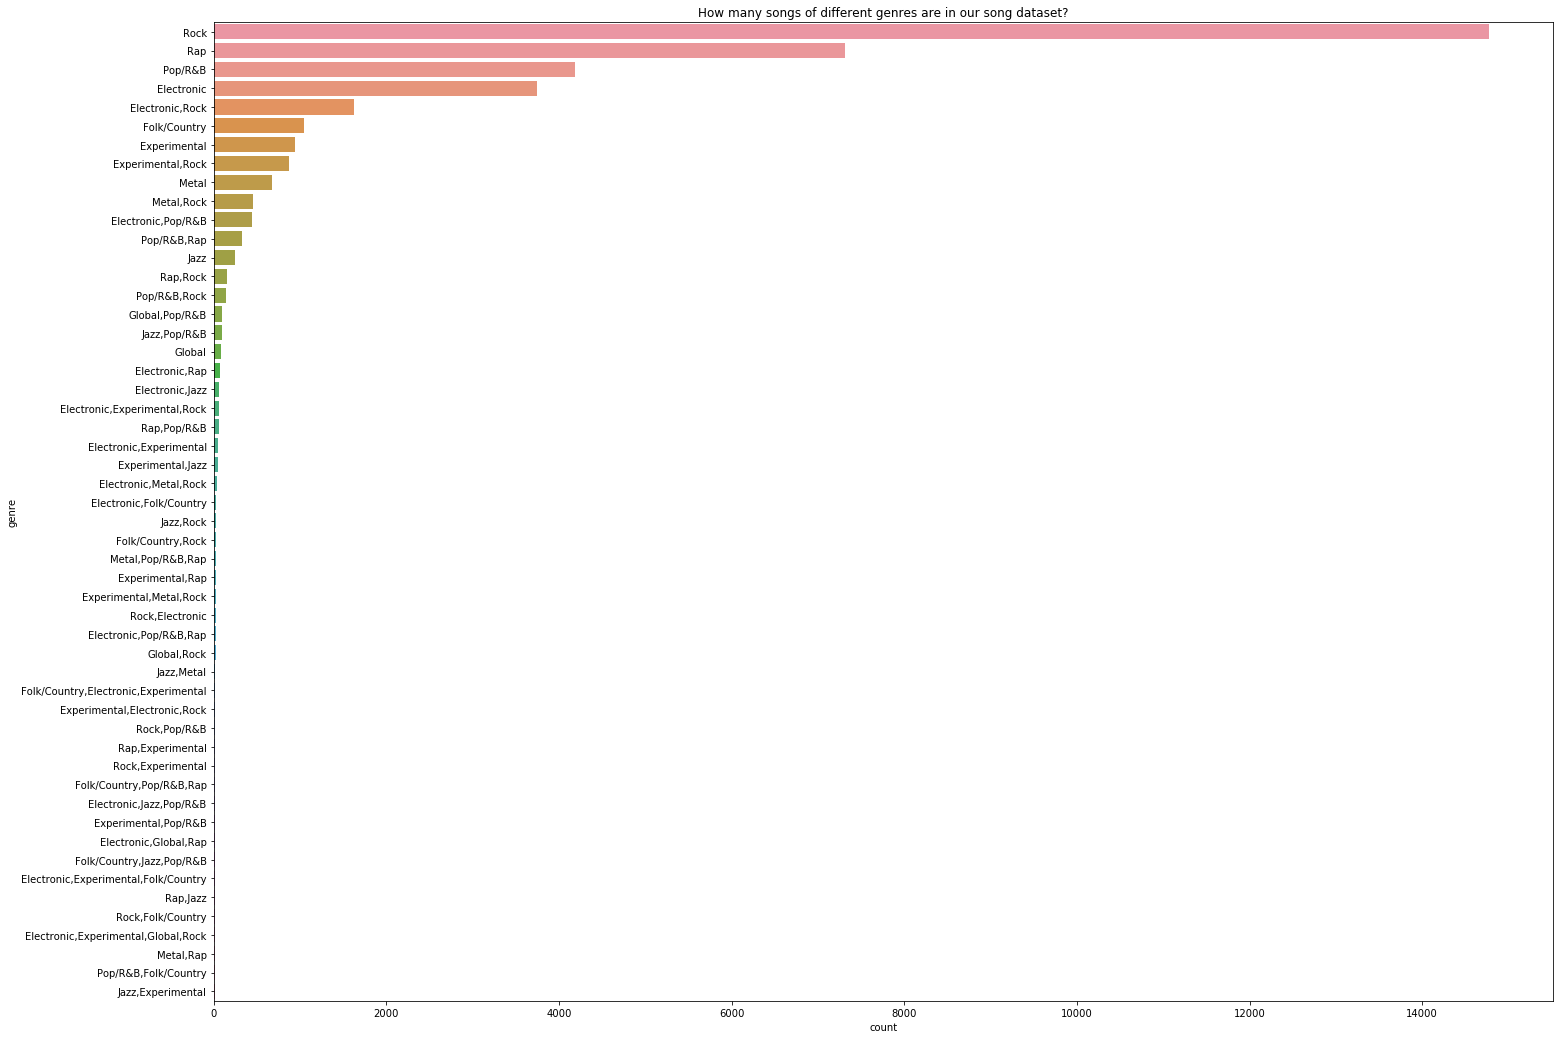

In [9]:
plt.figure(figsize = [24,18])
plt.title('How many songs of different genres are in our song dataset?')
sns.countplot(y="genre", data=df_songs,order = df_songs['genre'].value_counts().index)

Genres like 'Rock' and 'Rap' dominate our datasets, which might cause problems in following analysis like logistic regression.

## What genres do users like?

The reason why we merged df_albums and df_reviews is that we wanted to use 'rank' and 'score' to quantify the popularity of songs.

In [10]:
df_albums = df_albums.merge(df_reviews,on = 'album')
df_albums = df_albums.rename(columns= {'date_x':'date_album','date_y':'date_review'})
df_albums.head()

date_album         album  rank  length   track_length  \
0  2019-01-19    Hoodie SZN   1.0    20.0  185233.800000   
1  2019-01-12    Hoodie SZN   2.0    20.0  185233.800000   
2  2019-01-05    Hoodie SZN   2.0    20.0  185233.800000   
3  2019-01-19  I Am > I Was   2.0    15.0  211050.733333   
4  2019-01-12  I Am > I Was   1.0    15.0  211050.733333   

                   artist genre  score     date_review            author  \
0  A Boogie Wit Da Hoodie   Rap    6.8  January 8 2019   Alphonse Pierre   
1  A Boogie Wit Da Hoodie   Rap    6.8  January 8 2019   Alphonse Pierre   
2  A Boogie Wit Da Hoodie   Rap    6.8  January 8 2019   Alphonse Pierre   
3               21 Savage   Rap    7.8  January 2 2019  Paul A. Thompson   
4               21 Savage   Rap    7.8  January 2 2019  Paul A. Thompson   

            role                                             review  
0  Staff Writer   In New York, time moves at its own pace: Faceb...  
1  Staff Writer   In New York, time moves at its own pace: Faceb...  
2  Staff Writer   In New York, time moves at its own pace: Faceb...  
3    Contributor  The jarringly sober track “a lot,” which opens...  
4    Contributor  The jarringly sober track “a lot,” which opens...

To calculate the popularity of a song, we first calculated the mean value of the rank of a song, which stands for the average rank of a song. The reason why we grouped by 'genre' and 'album' is that we would like to see the popularity of each genre.

In [11]:
df_albums.groupby(['genre','album']).mean()

rank  \
genre             album                                                   
Electronic        9                                          132.850000   
                  A Moment Apart                             134.900000   
                  Adventure                                   43.000000   
                  After Hours                                138.700000   
                  Again                                       93.875000   
                  Alien                                      145.125000   
                  Alive 2007                                 179.333333   
                  Alpha                                       74.375000   
                  Always Outnumbered, Never Outgunned        102.500000   
                  America                                     56.555556   
                  Anchor                                      87.333333   
                  Angels & Devils                             96.000000   
                  Angles                                      92.818182   
                  Animals                                     58.166667   
                  Another Side                               135.928571   
                  Anything In Return                         128.500000   
                  Atlantis                                   174.200000   
                  Audio, Video, Disco                         37.000000   
                  Authenticity                               145.000000   
                  Autobiography                               46.300000   
                  Awake                                      101.841727   
                  Barking                                    151.000000   
                  Beaucoup Fish                              146.800000   
                  Believer                                   124.166667   
                  Black Diamond                              101.823529   
                  Black Gold                                 164.384615   
                  Black Sun                                  193.000000   
                  Bloodline                                  113.000000   
                  Blowback                                   162.000000   
                  Blush                                      175.000000   
...                                                                 ...   
Rock              Wonderful Wonderful                         94.800000   
                  Wondrous Bughouse                           76.000000   
                  Woodstock                                   77.717391   
                  Work                                       200.000000   
                  Worlds Apart                                78.189189   
                  Worship                                    110.081395   
                  Wowee Zowee: Sordid Sentinels Edition      185.000000   
                  Wrecking Ball                              106.090909   
                  Write About Love                            88.200000   
                  Writer's Block                             181.333333   
                  X&Y                                         77.537313   
                  Year Zero                                   78.705882   
                  Yellow Submarine                            51.120000   
                  You Can't Take It With You                  88.000000   
                  You Want It Darker                          64.700000   
                  You're Gonna Miss It All                    97.000000   
                  Young Americans                             74.803922   
                  Your Arsenal                               105.642857   
                  Yours Conditionally                         91.000000   
                  Z                                          142.000000   
                  Zion                                       135.743590   
                 

By calculating the average rank of different genres, we can see that 'Jazz,Metal' ranks the first, while 'Electronic,Experimental,Folk/Country' has the lowest popularity.

In [12]:
df_albums.groupby(['genre','album']).mean().groupby(['genre']).mean().sort_values(by = 'rank')

rank     length   track_length  \
genre                                                                        
Jazz,Metal                             29.500000  10.000000  239993.000000   
Electronic,Experimental,Global,Rock    42.000000  12.000000  254375.166667   
Pop/R&B,Folk/Country                   49.000000  10.000000  239129.400000   
Jazz,Experimental                      56.520000  10.000000  199677.100000   
Folk/Country,Jazz,Pop/R&B              67.500000  13.000000  261401.769231   
Electronic,Rap                         70.109589  26.273973  237182.531984   
Electronic,Global,Rap                  78.157895  13.000000  285695.000000   
Rap,Experimental                       78.189189   6.081081  199892.226126   
Electronic,Folk/Country                80.653846  15.000000  240494.486111   
Metal,Pop/R&B,Rap                      82.659091  13.500000  253807.664835   
Experimental,Metal,Rock                85.422619  12.065476  219090.552624   
Pop/R&B,Rap                            86.750254  16.168745  227690.913889   
Rock,Pop/R&B                           91.333333  16.000000  215844.750000   
Rap                                    94.265407  15.413893  227610.930622   
Pop/R&B,Rock                           96.299515  12.333333  273172.721314   
Electronic,Metal,Rock                  96.348485  12.000000  297111.201632   
Experimental,Pop/R&B                   96.625000  14.000000  234609.571429   
Rap,Pop/R&B                            98.828070  14.298246  250192.225783   
Electronic,Pop/R&B,Rap                 99.214286  10.500000  259142.888889   
Pop/R&B                               101.477483  13.424205  239588.965840   
Folk/Country,Pop/R&B,Rap              102.000000  15.000000  229965.866667   
Folk/Country,Electronic,Experimental  104.000000  17.000000  268619.529412   
Rap,Rock                              106.135143  16.888889  217098.056918   
Electronic,Pop/R&B                    106.143812  12.568108  251798.469813   
Electronic,Experimental,Rock          106.869568  10.198148  200859.196892   
Rock                                  108.840226  12.770653  245826.984398   
Rap,Jazz                              109.000000  12.000000  165817.166667   
Metal                                 109.154509  11.377417  285465.962069   
Experimental,Jazz                     110.105556  11.887500  224664.135346   
Electronic,Jazz                       110.329563  15.194444  297922.691997   
Folk/Country                          112.189432  12.467340  239268.908784   
Experimental,Rock                     113.347191  13.195606  270622.574690   
Electronic                            113.438149  13.188734  252062.074160   
Global                                114.438544  12.270314  223018.699921   
Electronic,Rock                       115.054592  12.564562  238542.636766   
Metal,Rock                            115.379767  11.942551  240205.861370   
Electronic,Experimental               117.873674  15.000000  279385.619619   
Experimental                          119.203283  13.298524  253504.029565   
Jazz                                  119.409188  12.445936  308104.138471   
Jazz,Rock                             120.020661  14.500000  204325.136364   
Global,Rock                           121.000000  21.000000  145859.761905   
Electronic,Jazz,Pop/R&B               121.000000  15.000000  224297.400000   
Rock,Folk/Country                     121.500000  15.500000  172791.750000   
Global,Pop/R&B                        124.861303  12.434506  221781.355975   
Experimental,Electronic,Rock          128.621118  16.978261  272052.568886   
Jazz,Pop/R&B                          132.420927  13.790801  257925.724355   
Rock,Experimental                     133.750000   7.500000  526779.556818   
Folk/Country,Rock                     143.125000  13.500000  332829.917614   
Rock,Electronic                       146.500000  22.000000  218026.409091   
Metal,Rap                             157.000000  11.000000  22405

<p>We can use another approach to measure popularity. The average score of songs with respect to each genre represents it.</p>
<p>'Electronic,Jazz,Pop/R&B' has the lowest score, while 'Rock,Experimental' has the highest score.

In [13]:
df_albums.groupby(['genre','album']).mean().groupby(['genre']).mean().sort_values(by = 'score')

rank     length   track_length  \
genre                                                                        
Electronic,Jazz,Pop/R&B               121.000000  15.000000  224297.400000   
Jazz,Experimental                      56.520000  10.000000  199677.100000   
Rock,Pop/R&B                           91.333333  16.000000  215844.750000   
Rock,Electronic                       146.500000  22.000000  218026.409091   
Electronic,Pop/R&B,Rap                 99.214286  10.500000  259142.888889   
Metal,Pop/R&B,Rap                      82.659091  13.500000  253807.664835   
Folk/Country,Pop/R&B,Rap              102.000000  15.000000  229965.866667   
Metal,Rap                             157.000000  11.000000  224053.000000   
Folk/Country,Electronic,Experimental  104.000000  17.000000  268619.529412   
Electronic,Experimental,Global,Rock    42.000000  12.000000  254375.166667   
Rap,Rock                              106.135143  16.888889  217098.056918   
Electronic,Global,Rap                  78.157895  13.000000  285695.000000   
Experimental,Pop/R&B                   96.625000  14.000000  234609.571429   
Rock,Folk/Country                     121.500000  15.500000  172791.750000   
Rap,Pop/R&B                            98.828070  14.298246  250192.225783   
Rap,Jazz                              109.000000  12.000000  165817.166667   
Electronic,Rock                       115.054592  12.564562  238542.636766   
Pop/R&B,Rap                            86.750254  16.168745  227690.913889   
Electronic,Metal,Rock                  96.348485  12.000000  297111.201632   
Experimental,Electronic,Rock          128.621118  16.978261  272052.568886   
Folk/Country,Rock                     143.125000  13.500000  332829.917614   
Metal,Rock                            115.379767  11.942551  240205.861370   
Electronic                            113.438149  13.188734  252062.074160   
Global                                114.438544  12.270314  223018.699921   
Experimental,Metal,Rock                85.422619  12.065476  219090.552624   
Rap                                    94.265407  15.413893  227610.930622   
Electronic,Rap                         70.109589  26.273973  237182.531984   
Electronic,Pop/R&B                    106.143812  12.568108  251798.469813   
Pop/R&B                               101.477483  13.424205  239588.965840   
Pop/R&B,Folk/Country                   49.000000  10.000000  239129.400000   
Rap,Experimental                       78.189189   6.081081  199892.226126   
Rock                                  108.840226  12.770653  245826.984398   
Metal                                 109.154509  11.377417  285465.962069   
Electronic,Experimental               117.873674  15.000000  279385.619619   
Electronic,Experimental,Rock          106.869568  10.198148  200859.196892   
Folk/Country,Jazz,Pop/R&B              67.500000  13.000000  261401.769231   
Experimental,Rock                     113.347191  13.195606  270622.574690   
Folk/Country                          112.189432  12.467340  239268.908784   
Global,Pop/R&B                        124.861303  12.434506  221781.355975   
Experimental,Jazz                     110.105556  11.887500  224664.135346   
Global,Rock                           121.000000  21.000000  145859.761905   
Electronic,Folk/Country                80.653846  15.000000  240494.486111   
Electronic,Jazz                       110.329563  15.194444  297922.691997   
Pop/R&B,Rock                           96.299515  12.333333  273172.721314   
Jazz,Rock                             120.020661  14.500000  204325.136364   
Experimental                          119.203283  13.298524  253504.029565   
Jazz,Metal                             29.500000  10.000000  239993.000000   
Jazz                                  119.409188  12.445936  308104.138471   
Electronic,Experimental,Folk/Country  179.000000  12.000000  192727.833333   
Jazz,Pop/R&B                          132.420927  13.790801  25792

# Using PCA to Classify Genres

## Can we use PCA to classify all genres in our datasets?

<p>The pair plots can help us first understand the distribution of each variable as well as the relationship between each two variables.</p>
<p>Unfortunately, there are a great number of records in our datasets. Therefore, the pair plots include so much information that we cannot see the useful one. 

In [14]:
sns.pairplot(df_songs_extracted,vars = ['acousticness',
      'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
      'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
      'time_signature', 'valence'],hue = 'target')

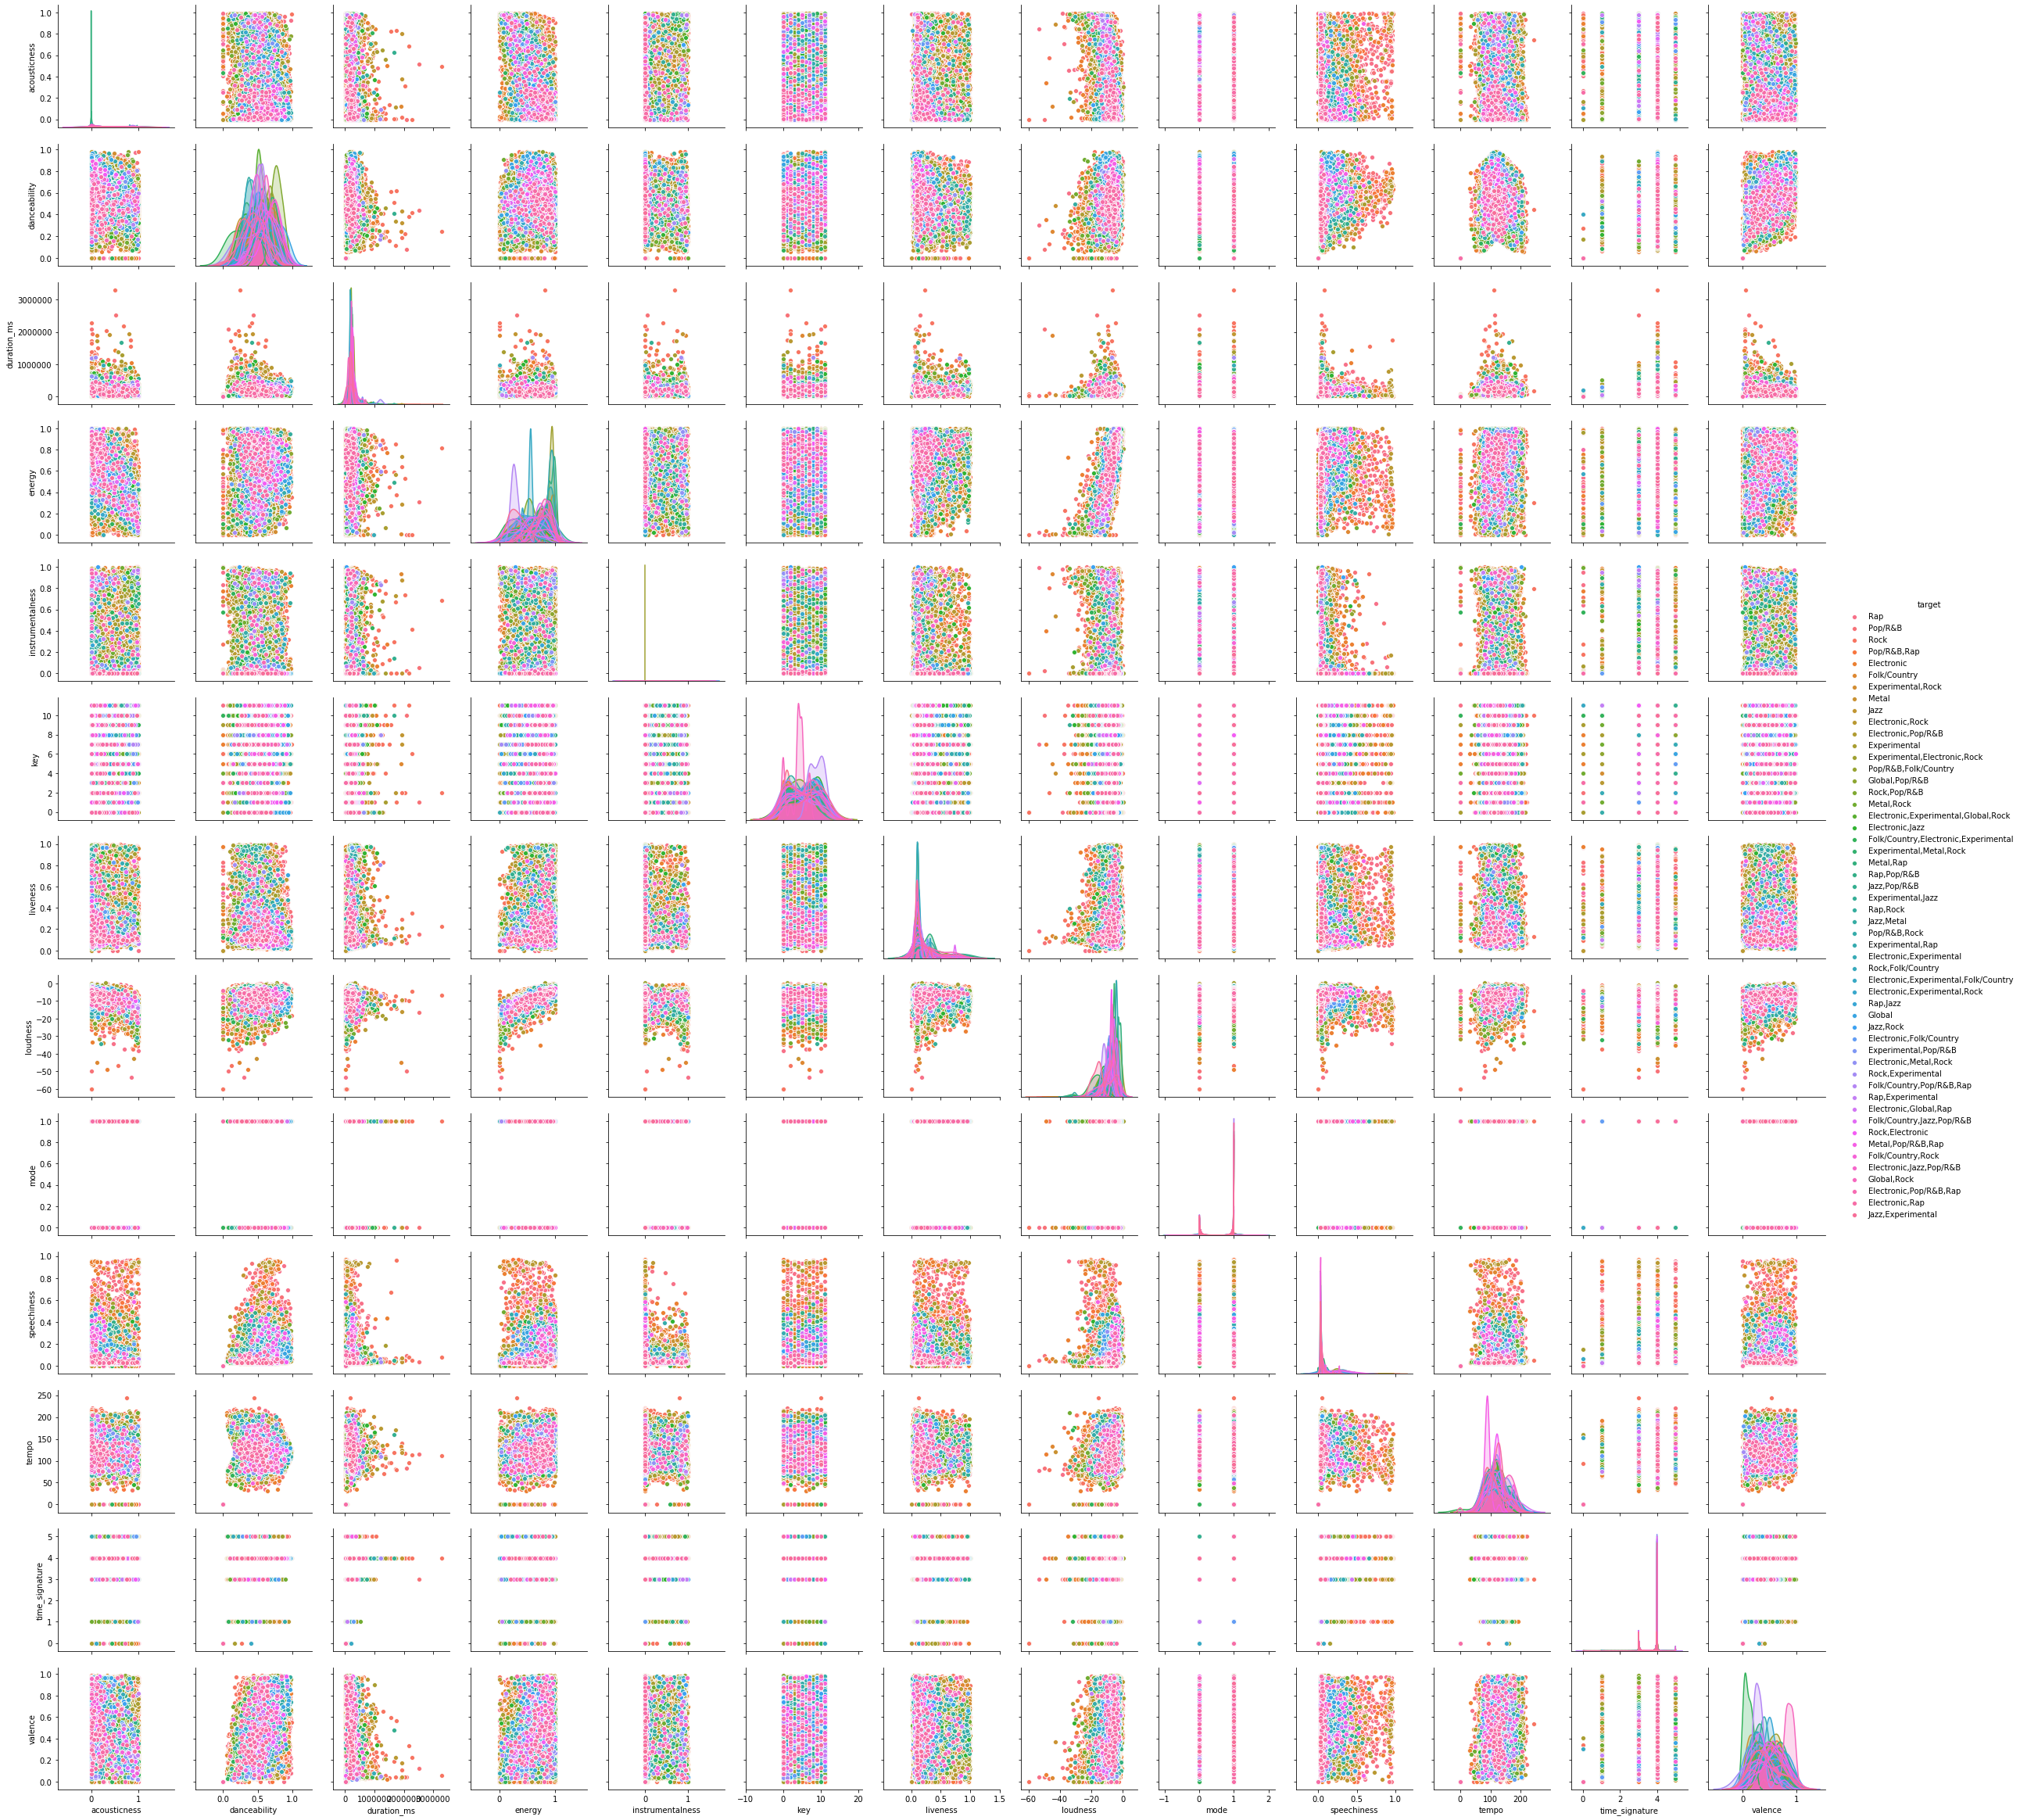

## Data Normalization

In [15]:
scaler = StandardScaler() # Data Normalization

There are 13 audio features for each song. And we decided to use all of them to see the results of PCA.

In [16]:
df_songs_extracted = df_songs
songs_features = df_songs_extracted[['acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence']]
songs_features = scaler.fit_transform(songs_features)
songs_features

array([[-0.65679749,  1.20437004, -0.97619199, ..., -1.02370973,
         0.22441036, -1.04552129],
       [ 0.13311013,  1.81845199, -0.86703397, ...,  0.16860247,
         0.22441036, -0.35653176],
       [-0.33114847,  0.99581391, -0.21926075, ..., -1.04740422,
         0.22441036, -1.09090384],
       ...,
       [ 1.60270572,  0.24848777, -1.05189133, ...,  1.09505048,
         0.22441036,  1.71043686],
       [ 1.15514706,  0.71773907, -0.45052686, ...,  0.08500617,
         0.22441036,  1.83008175],
       [ 1.98012459, -1.07236775, -0.5956838 , ..., -0.99938294,
         0.22441036, -0.04710532]])

Let's take a look at the cumulative explained ratio plot and the scree plot.

Text(0, 0.5, 'Proportion of Variance Explained')

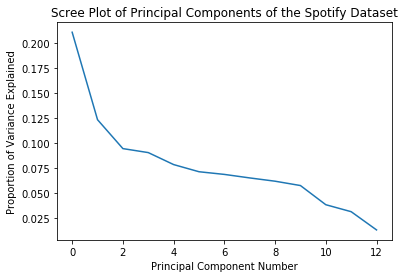

In [17]:
pca = PCA()
exp_variance = pca.fit(songs_features).explained_variance_ratio_
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

plt.figure()
plt.title('Scree Plot of Principal Components of the Spotify Dataset')
plt.plot(range(pca.n_components_),exp_variance)
plt.xlabel('Principal Component Number')
plt.ylabel('Proportion of Variance Explained')

9 components are needed to separate all genres.


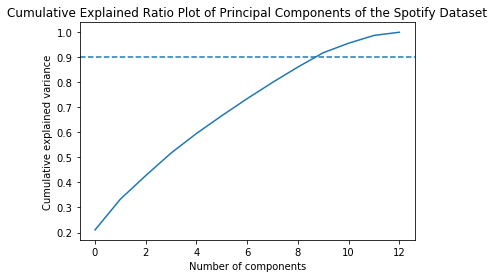

In [18]:
# Plot the cumulative explained variance and draw a dashed line at 0.90.
plt.figure()
plt.plot(cum_exp_variance)
plt.axhline(y=0.9, linestyle='--')
n_components = np.sum(cum_exp_variance <= 0.9)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.title('Cumulative Explained Ratio Plot of Principal Components of the Spotify Dataset')
print(str(n_components)+' components are needed to separate all genres.')

<p> 9 components are needed to separate all genres.</p>
<p> In addition, the cumulative explained ratio plot is better than the scree plot when it comes to choosing a cutoff point to decide how many principal components are needed in our case.</p>

## Can we reduce the dimension into 2-D?

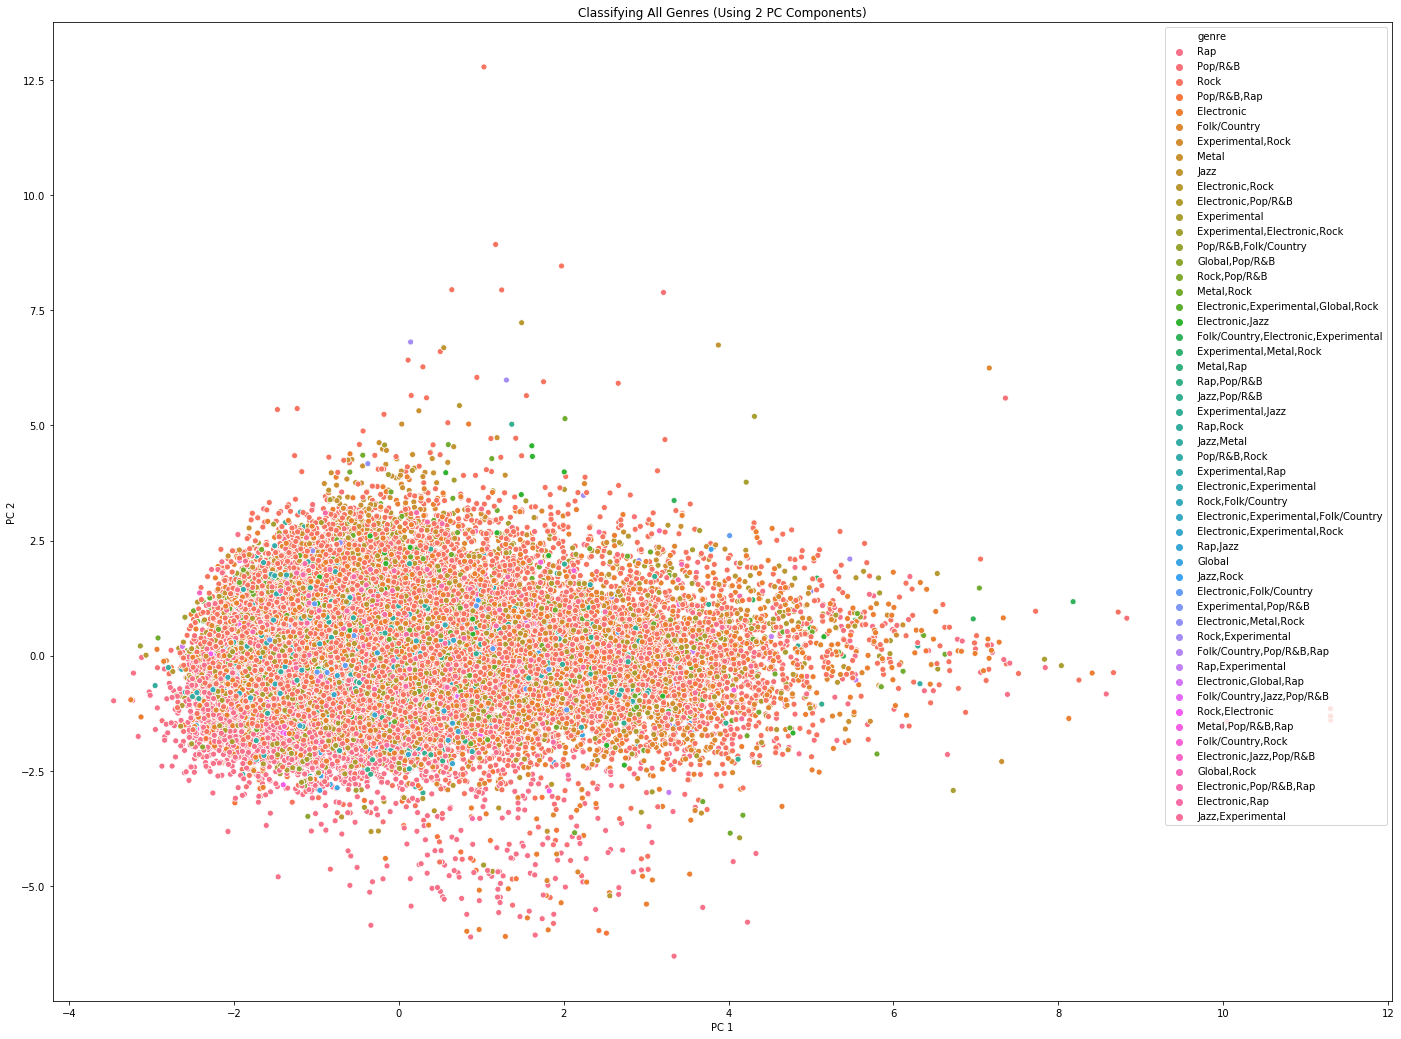

In [19]:
pca = PCA(2)
projected = pca.fit_transform(songs_features)
plt.figure(figsize = [24,18])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Classifying All Genres (Using 2 PC Components)')
sns.scatterplot(projected[:, 0], projected[:, 1], hue=df_songs_extracted['genre']);

Let's take a look at the zoom-in version.

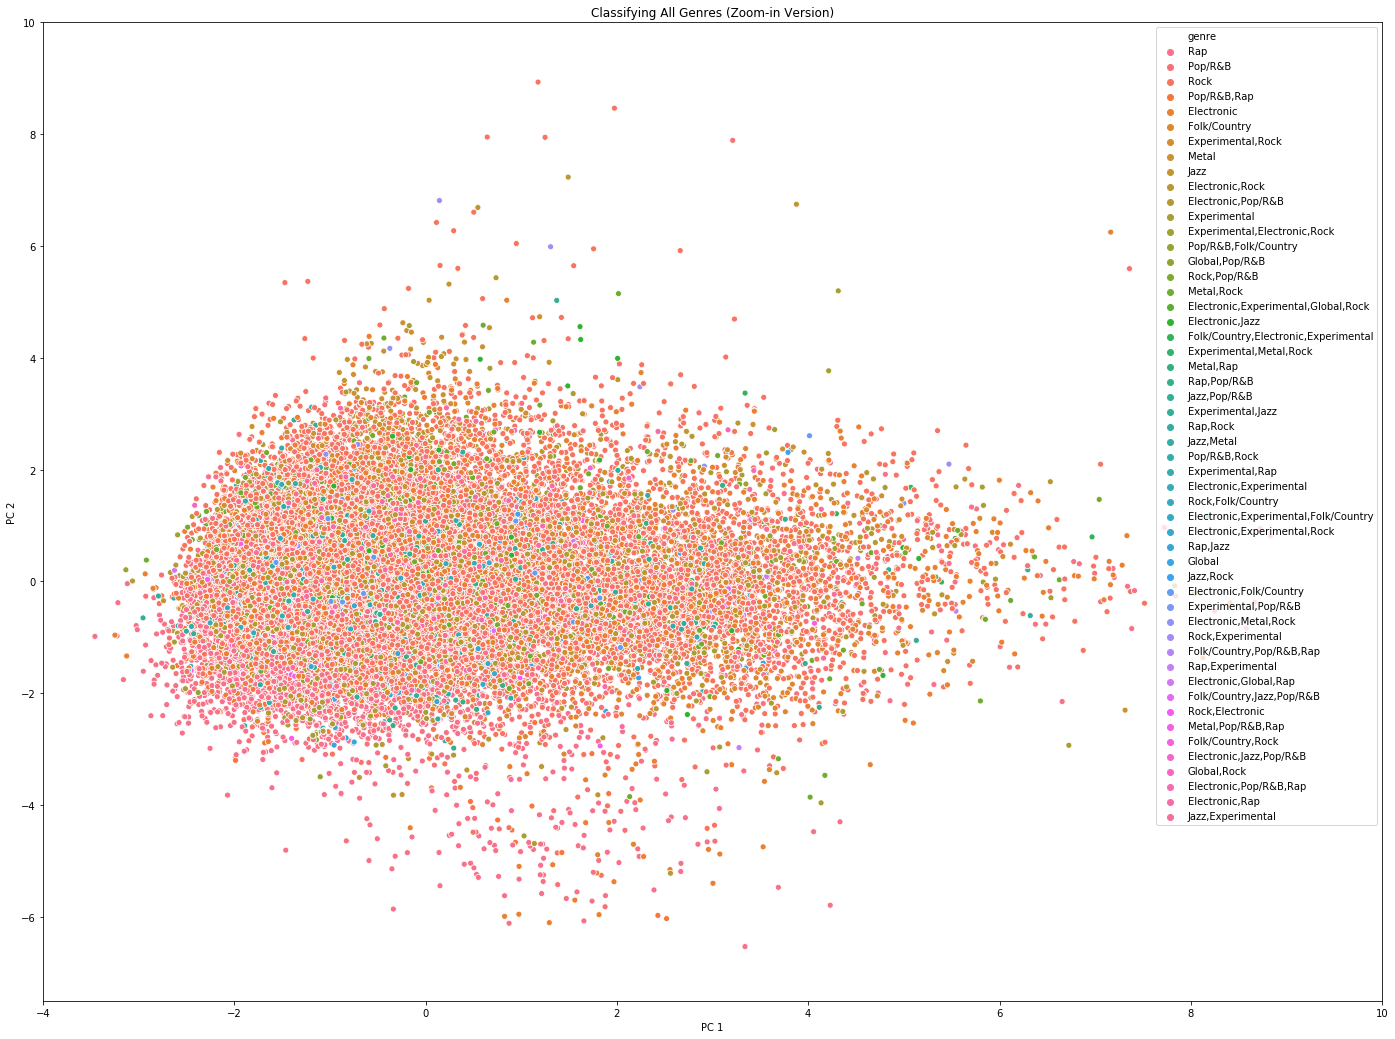

In [20]:
plt.figure(figsize = [24,18])
plt.xlim(-4,10)
plt.ylim(-7.5,10)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Classifying All Genres (Zoom-in Version)')
sns.scatterplot(projected[:, 0], projected[:, 1], hue=df_songs_extracted['genre']);

It seems that using only 2 principal components to classify genres does not show clear classification results.

## Can we use PCA to classify 7 genres?

<p>Though the previous classification results are not good, can we still use only 2 principal component to classify 'Rap', 'Rock', 'Electronic', 'Metal', 'Jazz', 'Experimental' and 'Global'?</p>

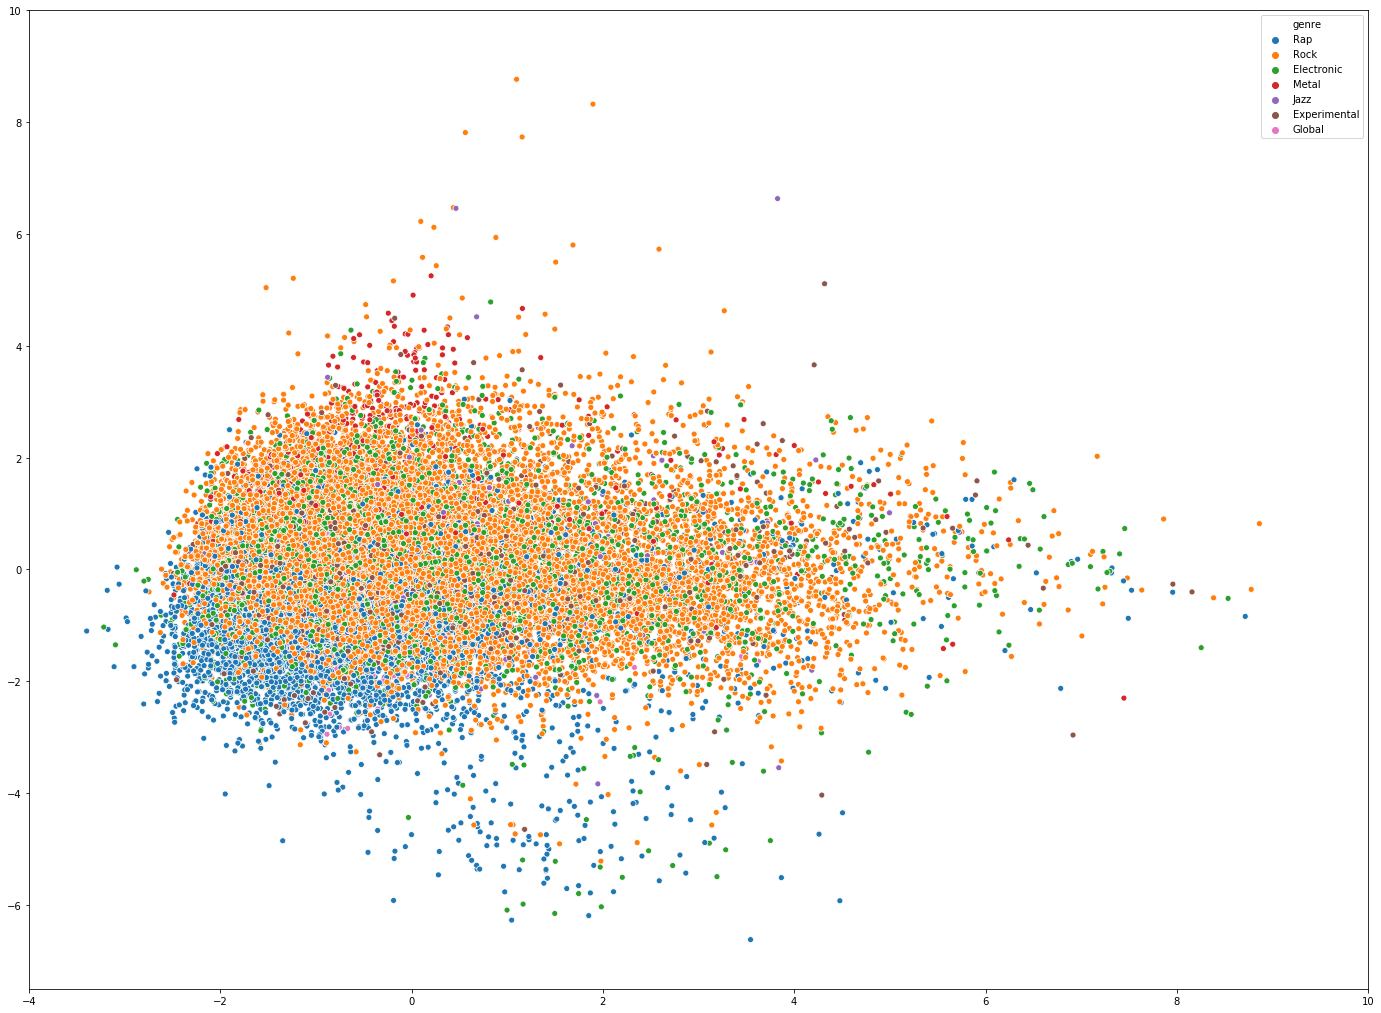

In [21]:
# Extracting the genres that have no '\' or ','
df_songs_extracted = df_songs[df_songs['genre'].str.contains(',') == False]
df_songs_extracted = df_songs_extracted[df_songs_extracted['genre'].str.contains('/') == False]

songs_features = df_songs_extracted[['acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence']]
songs_features = scaler.fit_transform(songs_features)
pca = PCA(2)
projected = pca.fit_transform(songs_features)
plt.figure(figsize = [24,18])
plt.xlim(-4,10)
plt.ylim(-7.5,10)
sns.scatterplot(projected[:, 0], projected[:, 1], hue=df_songs_extracted['genre']);

Let's take a look at the distribution of number of songs with respect to each genre.

In [22]:
df_songs_extracted['genre'].value_counts().to_dict()

{'Rock': 14776,
 'Rap': 7319,
 'Electronic': 3740,
 'Experimental': 937,
 'Metal': 678,
 'Jazz': 245,
 'Global': 79}

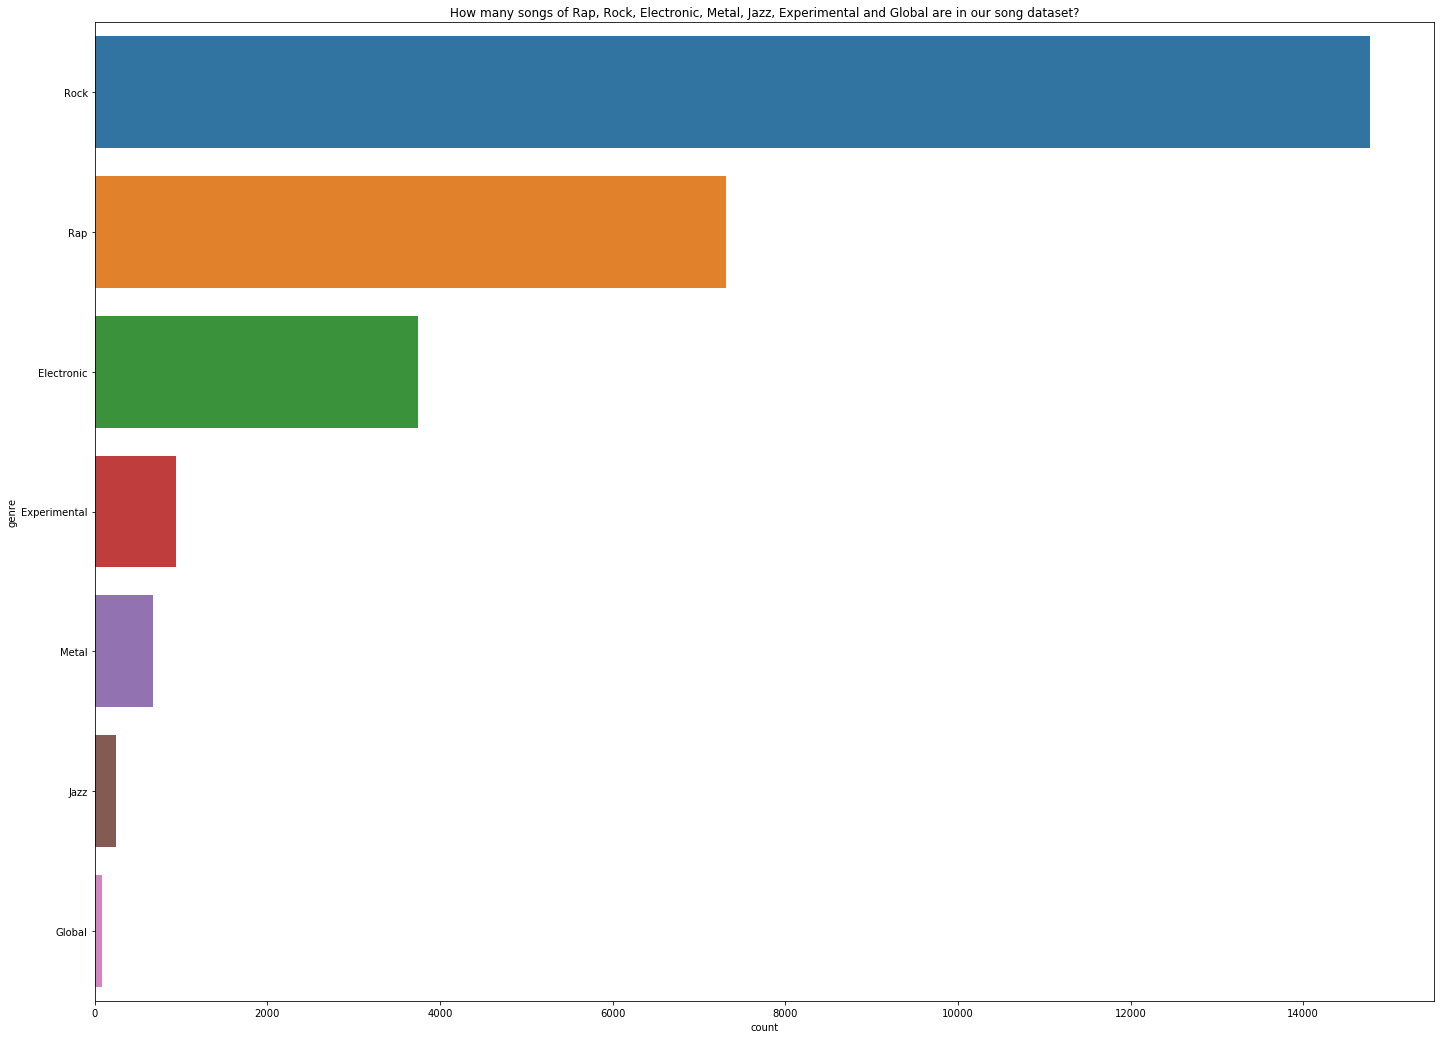

In [23]:
plt.figure(figsize = [24,18])
plt.title('How many songs of Rap, Rock, Electronic, Metal, Jazz, Experimental and Global are in our song dataset?')
sns.countplot(y="genre", data=df_songs_extracted,order = df_songs_extracted['genre'].value_counts().index)

## Can we use PCA to classify each two genres?

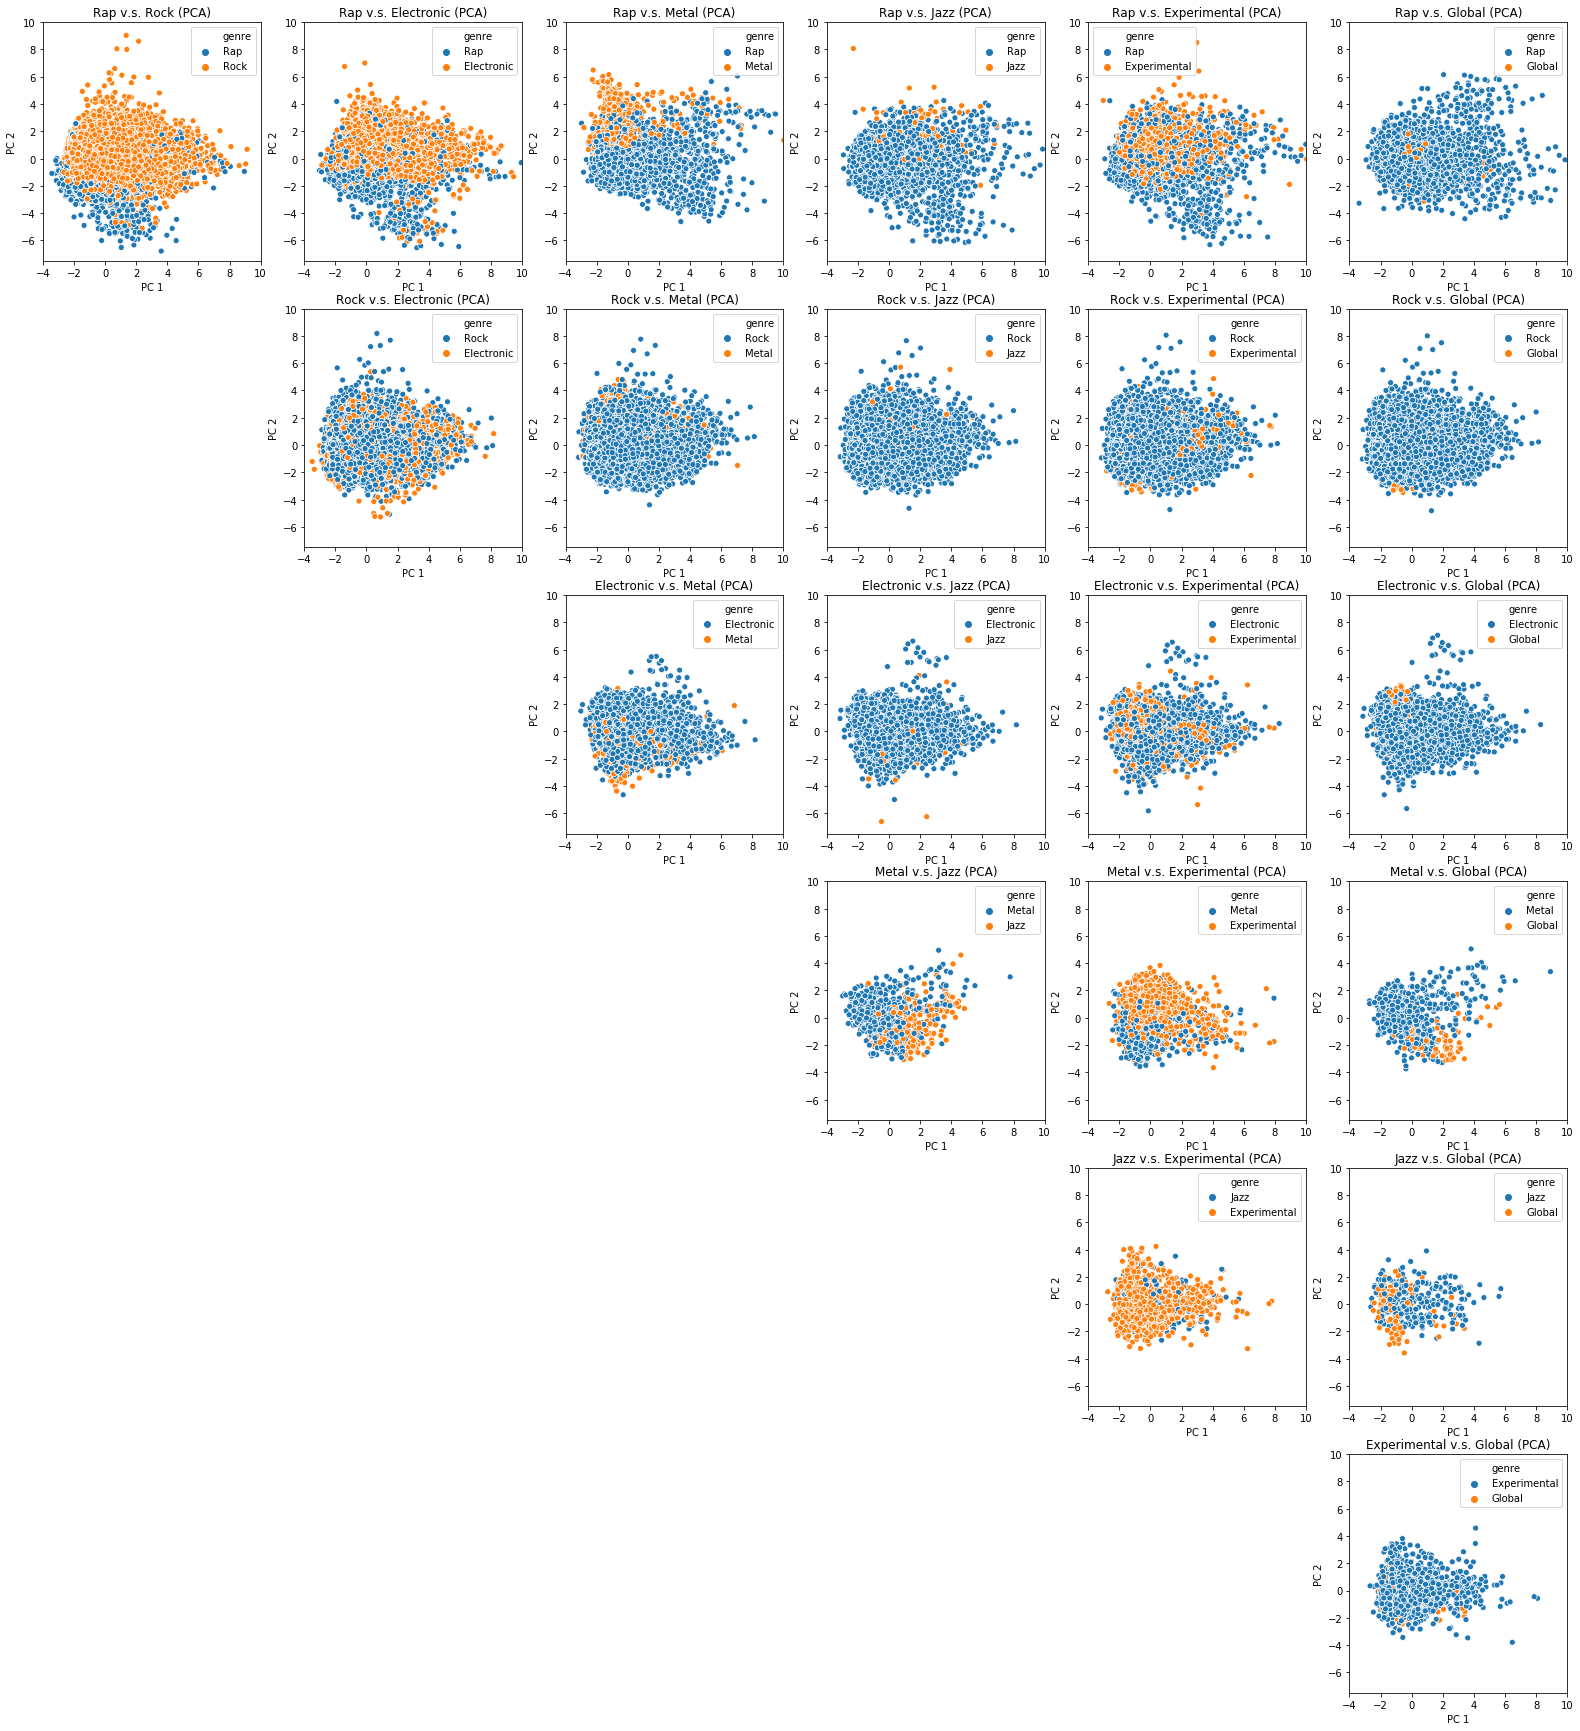

In [24]:
df_songs_extracted = df_songs[df_songs['genre'].str.contains(',') == False]
df_songs_extracted = df_songs_extracted[df_songs_extracted['genre'].str.contains('/') == False]
n = len(df_songs_extracted['genre'].unique())
fig = plt.figure(figsize = [32,36])
for i in range(n-1):
    for j in range(i+1,n):
        df_songs_plot = df_songs[(df_songs['genre']==df_songs_extracted['genre'].unique()[i]) | (df_songs['genre']==df_songs_extracted['genre'].unique()[j])]
        songs_features = df_songs_plot[['acousticness',
               'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
               'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
               'time_signature', 'valence']]
        songs_features = scaler.fit_transform(songs_features)
        pca = PCA(2)
        projected = pca.fit_transform(songs_features)
        ax = fig.add_subplot(n,n,i*n+j)
        plt.xlim(-4,10)
        plt.ylim(-7.5,10)
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        plt.title(df_songs_extracted['genre'].unique()[i]+' v.s. '+ df_songs_extracted['genre'].unique()[j]+' (PCA)')
        sns.scatterplot(projected[:, 0], projected[:, 1], hue=df_songs_plot['genre']);

<p>It seems that reducing the dimension into 2D is not a good way to classify each two genres.</p>
<p>So, how many principal components are needed to classify each two genres? </p>

9 components are needed to separate Rap and Rock.
9 components are needed to separate Rap and Electronic.
9 components are needed to separate Rap and Metal.
10 components are needed to separate Rap and Jazz.
10 components are needed to separate Rap and Experimental.
10 components are needed to separate Rap and Global.
9 components are needed to separate Rock and Electronic.
9 components are needed to separate Rock and Metal.
9 components are needed to separate Rock and Jazz.
9 components are needed to separate Rock and Experimental.
9 components are needed to separate Rock and Global.
9 components are needed to separate Electronic and Metal.
9 components are needed to separate Electronic and Jazz.
9 components are needed to separate Electronic and Experimental.
9 components are needed to separate Electronic and Global.
9 components are needed to separate Metal and Jazz.
9 components are needed to separate Metal and Experimental.
9 components are needed to separate Metal and Global.
9 c

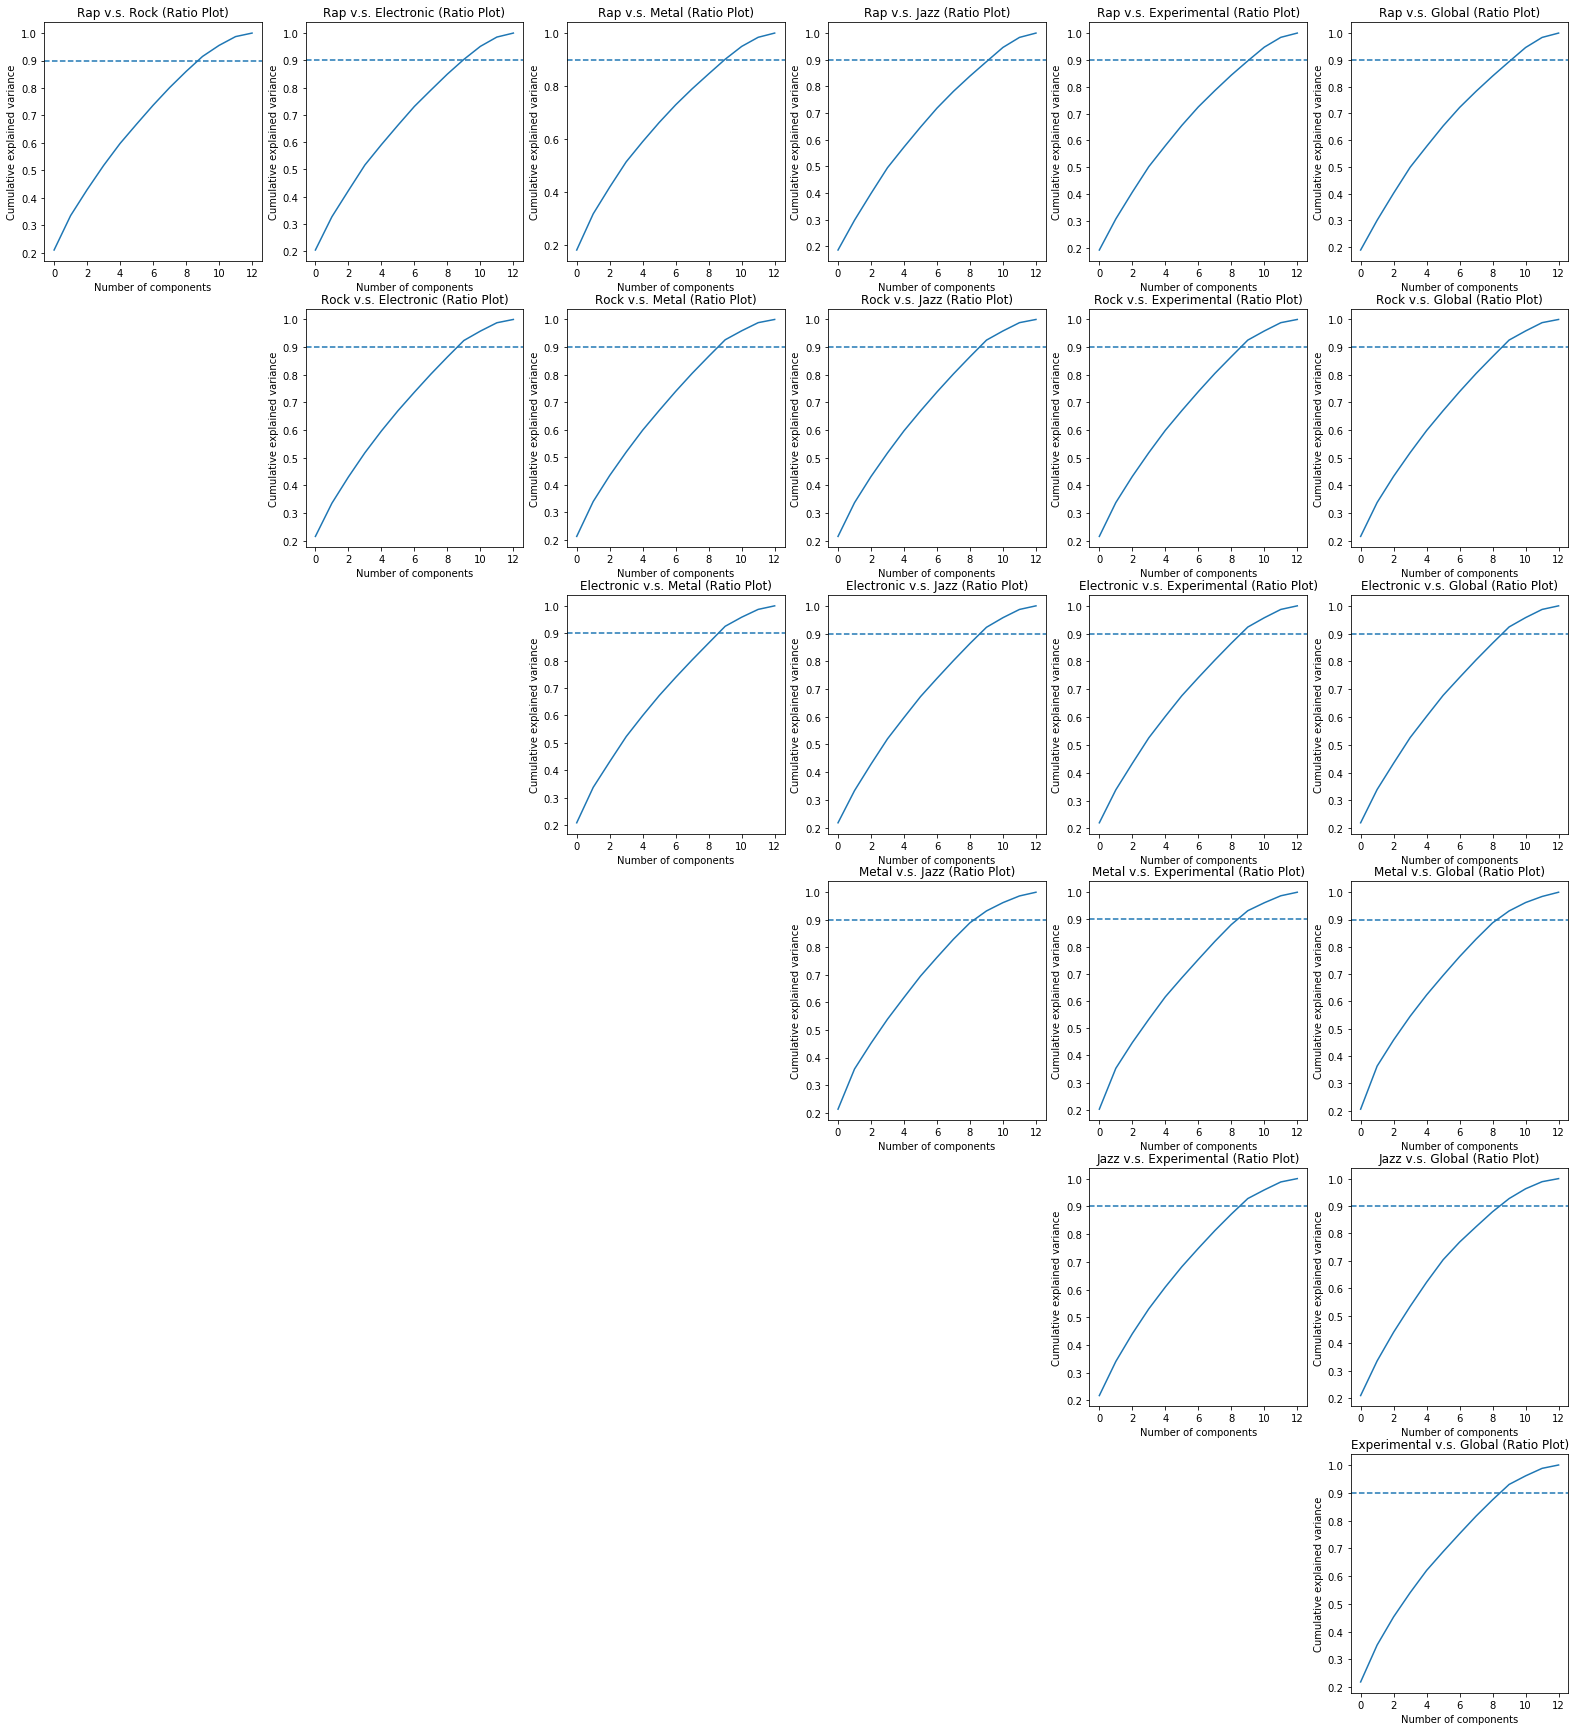

In [25]:
df_songs_extracted = df_songs[df_songs['genre'].str.contains(',') == False]
df_songs_extracted = df_songs_extracted[df_songs_extracted['genre'].str.contains('/') == False]
n = len(df_songs_extracted['genre'].unique())
fig = plt.figure(figsize = [32,36])
for i in range(n-1):
    for j in range(i+1,n):
        df_songs_plot = df_songs[(df_songs['genre']==df_songs_extracted['genre'].unique()[i]) | (df_songs['genre']==df_songs_extracted['genre'].unique()[j])]
        songs_features = df_songs_plot[['acousticness',
               'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
               'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
               'time_signature', 'valence']]
        songs_features = scaler.fit_transform(songs_features)
        pca = PCA()
        exp_variance = pca.fit(songs_features).explained_variance_ratio_
        # Calculate the cumulative explained variance
        cum_exp_variance = np.cumsum(exp_variance)
        
        # Draw a dashed line at 0.90.
        ax = fig.add_subplot(n,n,i*n+j)
        ax.plot(cum_exp_variance)
        ax.axhline(y=0.9, linestyle='--')
        n_components = np.sum(cum_exp_variance <= 0.9)
        plt.xlabel('Number of components')
        plt.ylabel('Cumulative explained variance');       
        plt.title(df_songs_extracted['genre'].unique()[i]+' v.s. '+ df_songs_extracted['genre'].unique()[j]+' (Ratio Plot)')
        print(str(n_components)+' components are needed to separate '+df_songs_extracted['genre'].unique()[i]+" and "+df_songs_extracted['genre'].unique()[j]+'.')

# Using Logistic Regression to Make Prediction for Genres

## Can we make this prediction based on audio features?

First, calculate the correlation matrix to see whether any two variables have a strong correlation or not.

In [26]:
songs_features = df_songs[['acousticness',
               'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
               'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
               'time_signature', 'valence']]
songs_features.corr()

acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.130712    -0.098761 -0.685410   
danceability         -0.130712      1.000000    -0.087133  0.032711   
duration_ms          -0.098761     -0.087133     1.000000  0.032853   
energy               -0.685410      0.032711     0.032853  1.000000   
instrumentalness      0.068938     -0.192886     0.067346 -0.068944   
key                  -0.026149      0.012348     0.011271  0.031436   
liveness             -0.055555     -0.115958     0.005870  0.169738   
loudness             -0.569248      0.120188     0.035273  0.753312   
mode                  0.059616     -0.075090    -0.041080 -0.045008   
speechiness          -0.052761      0.230266    -0.114395  0.109328   
tempo                -0.157278     -0.130681     0.011158  0.181824   
time_signature       -0.173632      0.186310     0.057804  0.179394   
valence              -0.197968      0.433021    -0.149976  0.324544   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.068938 -0.026149 -0.055555 -0.569248  0.059616   
danceability             -0.192886  0.012348 -0.115958  0.120188 -0.075090   
duration_ms               0.067346  0.011271  0.005870  0.035273 -0.041080   
energy                   -0.068944  0.031436  0.169738  0.753312 -0.045008   
instrumentalness          1.000000  0.002956 -0.033648 -0.240099 -0.023252   
key                       0.002956  1.000000  0.016511  0.019218 -0.195533   
liveness                 -0.033648  0.016511  1.000000  0.066626 -0.002806   
loudness                 -0.240099  0.019218  0.066626  1.000000 -0.031478   
mode                     -0.023252 -0.195533 -0.002806 -0.031478  1.000000   
speechiness              -0.164806  0.029841  0.143555  0.065339 -0.078936   
tempo                     0.016831 -0.013547 -0.006223  0.133896  0.025735   
time_signature           -0.040564  0.007203 -0.016246  0.181008 -0.024460   
valence                  -0.157191  0.029204  0.016796  0.201869  0.004079   

                  speechiness     tempo  time_signature   valence  
acousticness        -0.052761 -0.157278       -0.173632 -0.197968  
danceability         0.230266 -0.130681        0.186310  0.433021  
duration_ms         -0.114395  0.011158        0.057804 -0.149976  
energy               0.109328  0.181824        0.179394  0.324544  
instrumentalness    -0.164806  0.016831       -0.040564 -0.157191  
key                  0.029841 -0.013547        0.007203  0.029204  
liveness             0.143555 -0.006223       -0.016246  0.016796  
loudness             0.065339  0.133896        0.181008  0.201869  
mode                -0.078936  0.025735       -0.024460  0.004079  
speechiness          1.000000 -0.022903        0.030232  0.112396  
tempo               -0.022903  1.000000        0.032299  0.059413  
time_signature       0.030232  0.032299        1.000000  0.130263  
valence              0.112396  0.059413        0.130263  1.000000

Is there any correlation coefficient that is larger than 0.8?

In [27]:
songs_features.corr()>=0.8

acousticness  danceability  duration_ms  energy  \
acousticness              True         False        False   False   
danceability             False          True        False   False   
duration_ms              False         False         True   False   
energy                   False         False        False    True   
instrumentalness         False         False        False   False   
key                      False         False        False   False   
liveness                 False         False        False   False   
loudness                 False         False        False   False   
mode                     False         False        False   False   
speechiness              False         False        False   False   
tempo                    False         False        False   False   
time_signature           False         False        False   False   
valence                  False         False        False   False   

                  instrumentalness    key  liveness  loudness   mode  \
acousticness                 False  False     False     False  False   
danceability                 False  False     False     False  False   
duration_ms                  False  False     False     False  False   
energy                       False  False     False     False  False   
instrumentalness              True  False     False     False  False   
key                          False   True     False     False  False   
liveness                     False  False      True     False  False   
loudness                     False  False     False      True  False   
mode                         False  False     False     False   True   
speechiness                  False  False     False     False  False   
tempo                        False  False     False     False  False   
time_signature               False  False     False     False  False   
valence                      False  False     False     False  False   

                  speechiness  tempo  time_signature  valence  
acousticness            False  False           False    False  
danceability            False  False           False    False  
duration_ms             False  False           False    False  
energy                  False  False           False    False  
instrumentalness        False  False           False    False  
key                     False  False           False    False  
liveness                False  False           False    False  
loudness                False  False           False    False  
mode                    False  False           False    False  
speechiness              True  False           False    False  
tempo                   False   True           False    False  
time_signature          False  False            True    False  
valence                 False  False           False     True

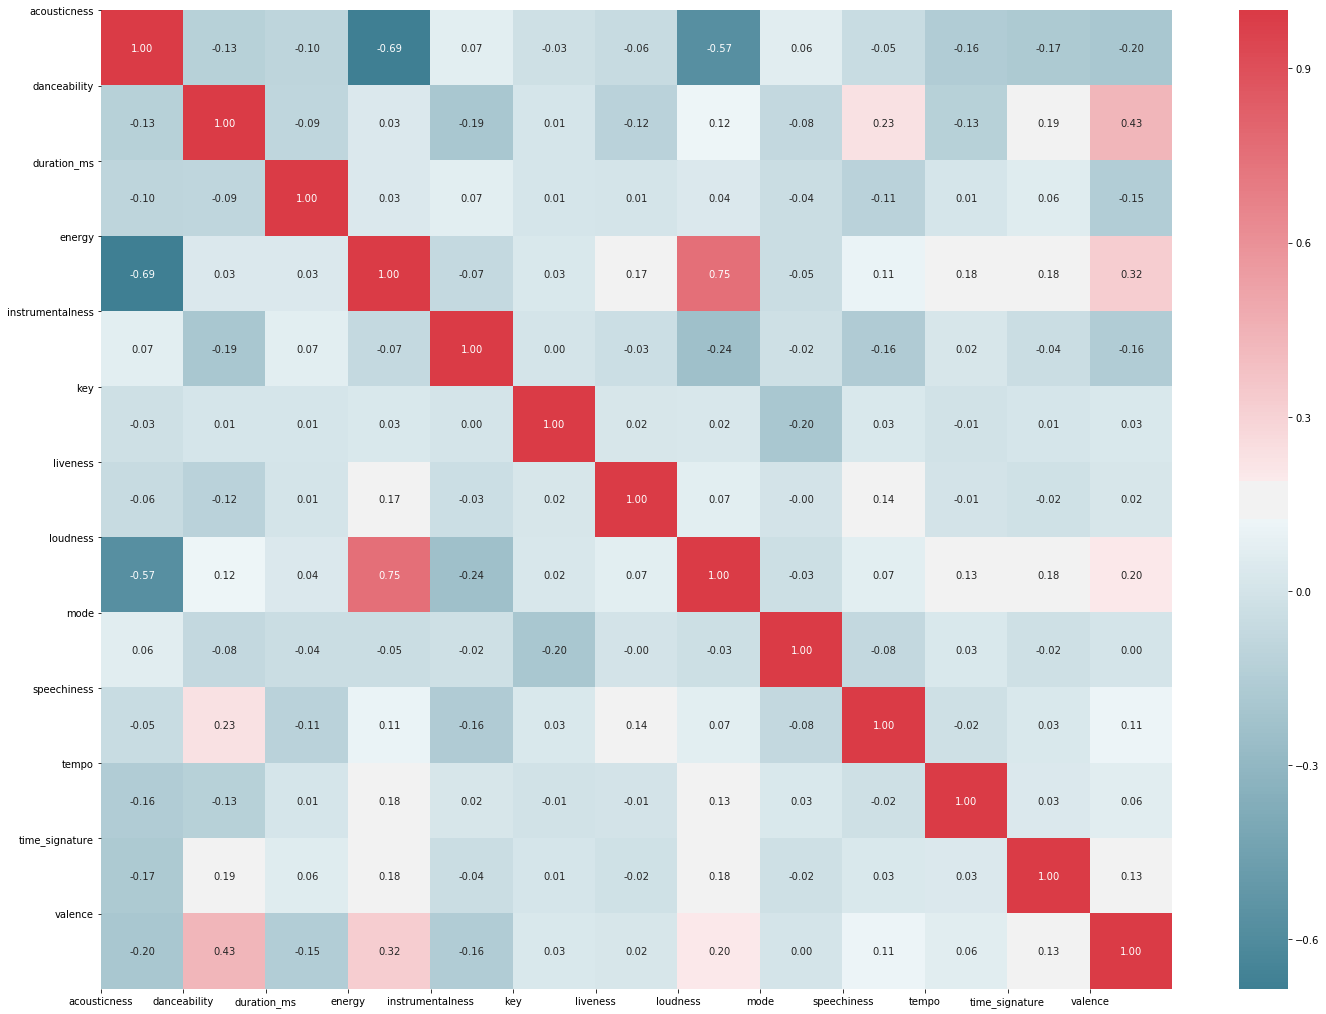

In [28]:
corr = songs_features.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(24,18))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

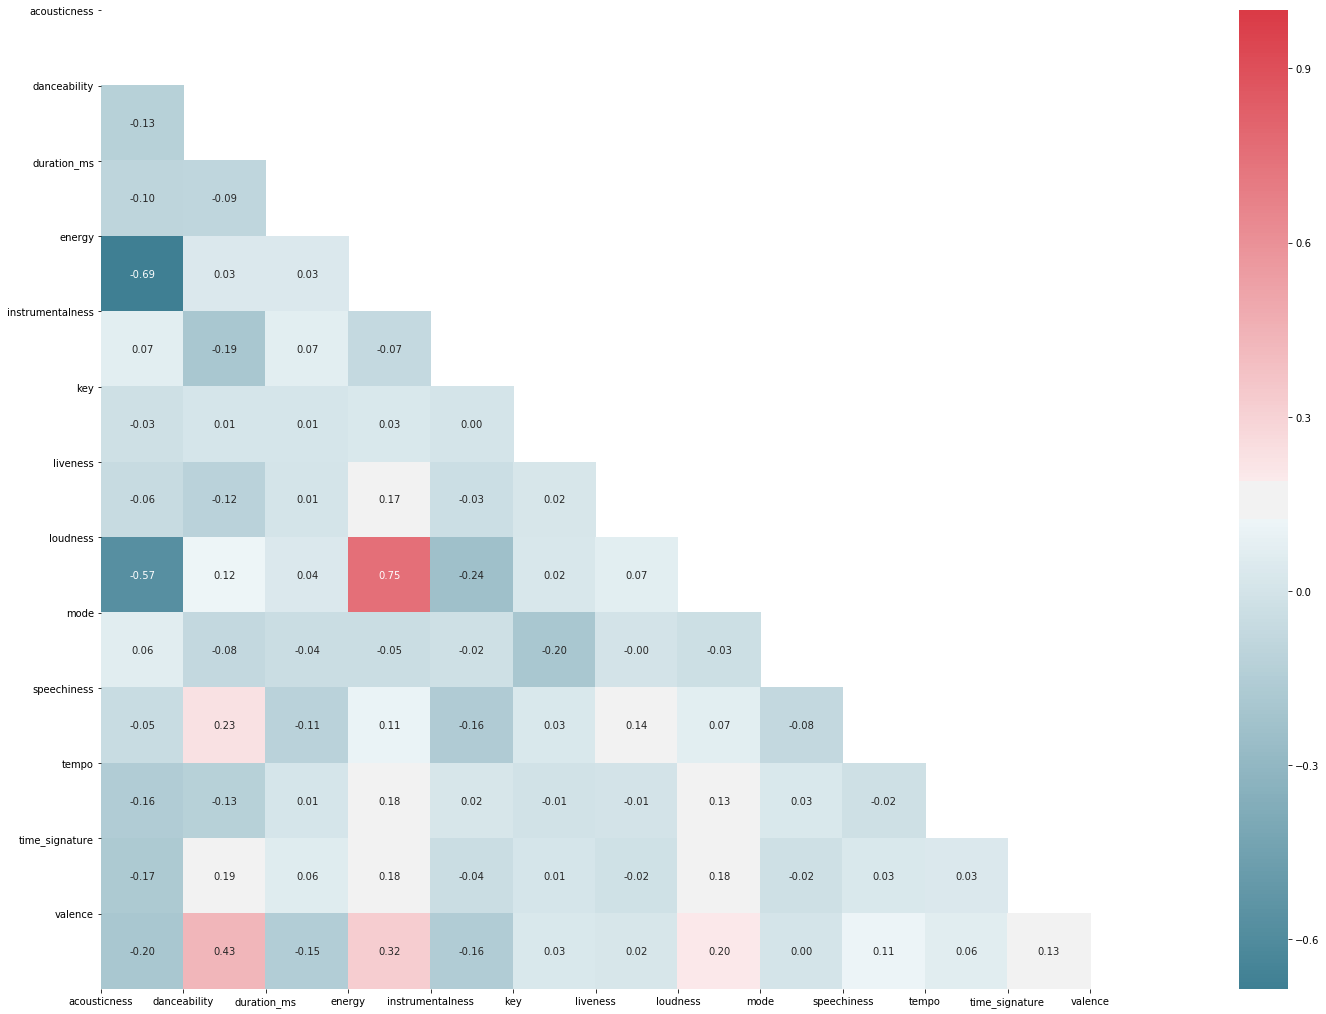

In [29]:
# Plot figsize
fig, ax = plt.subplots(figsize=(24, 18))
# Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
# Drop self-correlations
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
# Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
# show plot
plt.show()


The largest absolute value of the correlation coefficient is 0.75, which is lower than 0.8. 

## Using Logistic Regression to Make Prediction for Each Two Genres

In [30]:
df_songs_extracted = df_songs[df_songs['genre'].str.contains(',') == False]
df_songs_extracted = df_songs_extracted[df_songs_extracted['genre'].str.contains('/') == False]
n = len(df_songs_extracted['genre'].unique())
fig = plt.figure(figsize = [32,36])
for i in range(n-1):
    for j in range(i+1,n):
        df_songs_plot = df_songs[(df_songs['genre']==df_songs_extracted['genre'].unique()[i]) | (df_songs['genre']==df_songs_extracted['genre'].unique()[j])]
        songs_features = df_songs_plot[['acousticness',
               'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
               'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
               'time_signature', 'valence']]
        songs_features = scaler.fit_transform(songs_features)
        pca = PCA()
        exp_variance = pca.fit(songs_features).explained_variance_ratio_
        cum_exp_variance = np.cumsum(exp_variance)
        n_components = np.sum(cum_exp_variance <= 0.9)
        
        # Perform PCA with the chosen number of components and project data onto components
        pca = PCA(n_components, random_state=10)
        pca.fit(songs_features)
        pca_projection = pca.transform(songs_features)
        labels = df_songs_plot['genre']
        train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels,test_size = 0.25,random_state=10)

        # Train our logistic regression and predict labels for the test set
        logreg = LogisticRegression(random_state=10)
        logreg.fit(train_features,train_labels)
        pred_labels_logit = logreg.predict(test_features)

        # Create the classification report
        class_rep_log = classification_report(test_labels,pred_labels_logit)

        print("Logistic Regression: \n", class_rep_log)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

         Rap       0.84      0.68      0.75      1831
        Rock       0.85      0.94      0.89      3693

   micro avg       0.85      0.85      0.85      5524
   macro avg       0.85      0.81      0.82      5524
weighted avg       0.85      0.85      0.85      5524



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

  Electronic       0.73      0.53      0.61       898
         Rap       0.80      0.91      0.85      1867

   micro avg       0.78      0.78      0.78      2765
   macro avg       0.76      0.72      0.73      2765
weighted avg       0.78      0.78      0.77      2765



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

       Metal       0.82      0.47      0.60       167
         Rap       0.95      0.99      0.97      1833

   micro avg       0.95      0.95      0.95      2000
   macro avg       0.89      0.73      0.78      2000
weighted avg       0.94      0.95      0.94      2000



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

        Jazz       0.79      0.16      0.27        68
         Rap       0.97      1.00      0.98      1823

   micro avg       0.97      0.97      0.97      1891
   macro avg       0.88      0.58      0.63      1891
weighted avg       0.96      0.97      0.96      1891



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

Experimental       0.42      0.13      0.20       224
         Rap       0.90      0.98      0.94      1840

   micro avg       0.89      0.89      0.89      2064
   macro avg       0.66      0.56      0.57      2064
weighted avg       0.85      0.89      0.86      2064



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Logistic Regression: 
               precision    recall  f1-score   support

      Global       0.00      0.00      0.00        23
         Rap       0.99      1.00      0.99      1827

   micro avg       0.99      0.99      0.99      1850
   macro avg       0.49      0.50      0.50      1850
weighted avg       0.98      0.99      0.98      1850



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

  Electronic       0.68      0.01      0.03       965
        Rock       0.79      1.00      0.88      3664

   micro avg       0.79      0.79      0.79      4629
   macro avg       0.74      0.51      0.46      4629
weighted avg       0.77      0.79      0.71      4629



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

       Metal       0.46      0.08      0.13       157
        Rock       0.96      1.00      0.98      3707

   micro avg       0.96      0.96      0.96      3864
   macro avg       0.71      0.54      0.56      3864
weighted avg       0.94      0.96      0.94      3864



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

        Jazz       0.00      0.00      0.00        58
        Rock       0.98      1.00      0.99      3698

   micro avg       0.98      0.98      0.98      3756
   macro avg       0.49      0.50      0.50      3756
weighted avg       0.97      0.98      0.98      3756



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Logistic Regression: 
               precision    recall  f1-score   support

Experimental       0.00      0.00      0.00       241
        Rock       0.94      1.00      0.97      3688

   micro avg       0.94      0.94      0.94      3929
   macro avg       0.47      0.50      0.48      3929
weighted avg       0.88      0.94      0.91      3929



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

      Global       0.00      0.00      0.00        24
        Rock       0.99      1.00      1.00      3690

   micro avg       0.99      0.99      0.99      3714
   macro avg       0.50      0.50      0.50      3714
weighted avg       0.99      0.99      0.99      3714

Logistic Regression: 
               precision    recall  f1-score   support

  Electronic       0.89      0.98      0.94       939
       Metal       0.77      0.34      0.47       166

   micro avg       0.89      0.89      0.89      1105
   macro avg       0.83      0.66      0.70      1105
weighted avg       0.87      0.89      0.87      1105



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

  Electronic       0.96      1.00      0.98       950
        Jazz       1.00      0.09      0.16        47

   micro avg       0.96      0.96      0.96       997
   macro avg       0.98      0.54      0.57       997
weighted avg       0.96      0.96      0.94       997



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Logistic Regression: 
               precision    recall  f1-score   support

  Electronic       0.79      1.00      0.88       924
Experimental       0.00      0.00      0.00       246

   micro avg       0.79      0.79      0.79      1170
   macro avg       0.39      0.50      0.44      1170
weighted avg       0.62      0.79      0.70      1170



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.

Logistic Regression: 
               precision    recall  f1-score   support

  Electronic       0.98      1.00      0.99       939
      Global       0.00      0.00      0.00        16

   micro avg       0.98      0.98      0.98       955
   macro avg       0.49      0.50      0.50       955
weighted avg       0.97      0.98      0.97       955

Logistic Regression: 
               precision    recall  f1-score   support

        Jazz       0.80      0.48      0.60        67
       Metal       0.82      0.95      0.88       164

   micro avg       0.81      0.81      0.81       231
   macro avg       0.81      0.71      0.74       231
weighted avg       0.81      0.81      0.80       231

Logistic Regression: 
               precision    recall  f1-score   support

Experimental       0.73      0.85      0.79       219
       Metal       0.78      0.63      0.70       185

   micro avg       0.75      0.75      0.75       404
   macro avg       0.76      0.74      0.74       404
weigh

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

Experimental       0.83      1.00      0.91       242
        Jazz       0.83      0.09      0.17        54

   micro avg       0.83      0.83      0.83       296
   macro avg       0.83      0.54      0.54       296
weighted avg       0.83      0.83      0.77       296

Logistic Regression: 
               precision    recall  f1-score   support

      Global       0.56      0.26      0.36        19
        Jazz       0.81      0.94      0.87        62

   micro avg       0.78      0.78      0.78        81
   macro avg       0.68      0.60      0.61        81
weighted avg       0.75      0.78      0.75        81

Logistic Regression: 
               precision    recall  f1-score   support

Experimental       0.92      1.00      0.96       233
      Global       0.00      0.00      0.00        21

   micro avg       0.92      0.92      0.92       254
   macro avg       0.46      0.50      0.48       254
weigh

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



<Figure size 2304x2592 with 0 Axes>

<p>Logistic regression works well for our prediction!</p>
<p>However, after taking a closer look at the results, we may find that logistic regression for some cases (e.g., prediction for 'Global' v.s. 'Rap' shows really bad results! (The precision for 'Global' is 0.00!)</p>
<p>What are some of the ways that we can improve the precision?</p>

The answer is: 
#### Remove the bias by using the same number of samples when doing logistic regression.

In [31]:
df_songs_extracted = df_songs[df_songs['genre'].str.contains(',') == False]
df_songs_extracted = df_songs_extracted[df_songs_extracted['genre'].str.contains('/') == False]
n = len(df_songs_extracted['genre'].unique())
fig = plt.figure(figsize = [32,36])
for i in range(n-1):
    for j in range(i+1,n):
        df_songs_plot = df_songs[(df_songs['genre']==df_songs_extracted['genre'].unique()[i]) | (df_songs['genre']==df_songs_extracted['genre'].unique()[j])]
        songs_features = df_songs_plot[['acousticness',
               'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
               'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
               'time_signature', 'valence']]
        songs_features = scaler.fit_transform(songs_features)
        pca = PCA()
        exp_variance = pca.fit(songs_features).explained_variance_ratio_
        cum_exp_variance = np.cumsum(exp_variance)
        n_components = np.sum(cum_exp_variance <= 0.9)
        # Perform PCA with the chosen number of components and project data onto components
        pca = PCA(n_components, random_state=10)
        pca.fit(songs_features)
        pca_projection = pca.transform(songs_features)
        
        classi = df_songs_plot[df_songs_plot['genre'] == df_songs_extracted['genre'].unique()[i]]
        classj = df_songs_plot[df_songs_plot['genre'] == df_songs_extracted['genre'].unique()[j]]
        
        classii = classi.sample(min(classi.shape[0],classj.shape[0]),random_state=10)
        classjj = classj.sample(min(classi.shape[0],classj.shape[0]),random_state=10)
        df_songs_plot = pd.concat([classii,classjj])
        songs_features = df_songs_plot[['acousticness',
               'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
               'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
               'time_signature', 'valence']]
        songs_features = scaler.fit_transform(songs_features)
        pca_projection = pca.fit_transform(songs_features)

        labels = df_songs_plot['genre']
        train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels,test_size = 0.25,random_state=10)

        # Train our logistic regression and predict labels for the test set
        logreg = LogisticRegression(random_state=10)
        logreg.fit(train_features,train_labels)
        pred_labels_logit = logreg.predict(test_features)

        # Create the classification report
        class_rep_log = classification_report(test_labels,pred_labels_logit)

        print("Logistic Regression: \n", class_rep_log)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

         Rap       0.83      0.79      0.81      1856
        Rock       0.80      0.84      0.82      1804

   micro avg       0.82      0.82      0.82      3660
   macro avg       0.82      0.82      0.82      3660
weighted avg       0.82      0.82      0.82      3660



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

  Electronic       0.78      0.82      0.80       911
         Rap       0.82      0.78      0.80       959

   micro avg       0.80      0.80      0.80      1870
   macro avg       0.80      0.80      0.80      1870
weighted avg       0.80      0.80      0.80      1870



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

       Metal       0.85      0.85      0.85       171
         Rap       0.85      0.85      0.85       168

   micro avg       0.85      0.85      0.85       339
   macro avg       0.85      0.85      0.85       339
weighted avg       0.85      0.85      0.85       339



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

        Jazz       0.77      0.82      0.80        57
         Rap       0.84      0.79      0.81        66

   micro avg       0.80      0.80      0.80       123
   macro avg       0.80      0.81      0.80       123
weighted avg       0.81      0.80      0.81       123



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

Experimental       0.73      0.87      0.80       226
         Rap       0.85      0.70      0.77       243

   micro avg       0.78      0.78      0.78       469
   macro avg       0.79      0.79      0.78       469
weighted avg       0.80      0.78      0.78       469



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

      Global       0.52      0.71      0.60        17
         Rap       0.71      0.52      0.60        23

   micro avg       0.60      0.60      0.60        40
   macro avg       0.61      0.61      0.60        40
weighted avg       0.63      0.60      0.60        40



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

  Electronic       0.57      0.55      0.56       911
        Rock       0.59      0.61      0.60       959

   micro avg       0.58      0.58      0.58      1870
   macro avg       0.58      0.58      0.58      1870
weighted avg       0.58      0.58      0.58      1870



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

       Metal       0.74      0.76      0.75       171
        Rock       0.75      0.73      0.74       168

   micro avg       0.75      0.75      0.75       339
   macro avg       0.75      0.75      0.75       339
weighted avg       0.75      0.75      0.75       339



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

        Jazz       0.54      0.54      0.54        57
        Rock       0.61      0.61      0.61        66

   micro avg       0.58      0.58      0.58       123
   macro avg       0.57      0.57      0.57       123
weighted avg       0.58      0.58      0.58       123



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

Experimental       0.55      0.48      0.51       226
        Rock       0.57      0.63      0.60       243

   micro avg       0.56      0.56      0.56       469
   macro avg       0.56      0.56      0.55       469
weighted avg       0.56      0.56      0.56       469



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

      Global       0.47      0.41      0.44        17
        Rock       0.60      0.65      0.63        23

   micro avg       0.55      0.55      0.55        40
   macro avg       0.53      0.53      0.53        40
weighted avg       0.54      0.55      0.55        40



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

  Electronic       0.71      0.71      0.71       168
       Metal       0.72      0.72      0.72       171

   micro avg       0.72      0.72      0.72       339
   macro avg       0.72      0.72      0.72       339
weighted avg       0.72      0.72      0.72       339



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

  Electronic       0.60      0.55      0.57        66
        Jazz       0.52      0.58      0.55        57

   micro avg       0.56      0.56      0.56       123
   macro avg       0.56      0.56      0.56       123
weighted avg       0.56      0.56      0.56       123



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

  Electronic       0.55      0.37      0.44       243
Experimental       0.50      0.67      0.57       226

   micro avg       0.51      0.51      0.51       469
   macro avg       0.52      0.52      0.50       469
weighted avg       0.52      0.51      0.50       469



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

  Electronic       0.75      0.65      0.70        23
      Global       0.60      0.71      0.65        17

   micro avg       0.68      0.68      0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.69      0.68      0.68        40



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

        Jazz       0.74      0.74      0.74        57
       Metal       0.77      0.77      0.77        66

   micro avg       0.76      0.76      0.76       123
   macro avg       0.75      0.75      0.75       123
weighted avg       0.76      0.76      0.76       123

Logistic Regression: 
               precision    recall  f1-score   support

Experimental       0.69      0.73      0.71       171
       Metal       0.71      0.67      0.69       168

   micro avg       0.70      0.70      0.70       339
   macro avg       0.70      0.70      0.70       339
weighted avg       0.70      0.70      0.70       339



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

      Global       0.71      0.88      0.79        17
       Metal       0.89      0.74      0.81        23

   micro avg       0.80      0.80      0.80        40
   macro avg       0.80      0.81      0.80        40
weighted avg       0.82      0.80      0.80        40



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: 
               precision    recall  f1-score   support

Experimental       0.56      0.67      0.61        57
        Jazz       0.65      0.55      0.60        66

   micro avg       0.60      0.60      0.60       123
   macro avg       0.61      0.61      0.60       123
weighted avg       0.61      0.60      0.60       123

Logistic Regression: 
               precision    recall  f1-score   support

      Global       0.62      0.76      0.68        17
        Jazz       0.79      0.65      0.71        23

   micro avg       0.70      0.70      0.70        40
   macro avg       0.70      0.71      0.70        40
weighted avg       0.72      0.70      0.70        40

Logistic Regression: 
               precision    recall  f1-score   support

Experimental       0.74      0.61      0.67        23
      Global       0.57      0.71      0.63        17

   micro avg       0.65      0.65      0.65        40
   macro avg       0.65      0.66      0.65        40
weigh

<Figure size 2304x2592 with 0 Axes>

The improvement is obvious. In most cases, false negatives and false positives of these logistic regression models happen much less frequently than those of the previous ones since we have balanced our input datasets before doing logistic regression.

## Cross Validation to Evaluate the Logistic Regression Models

In [32]:
df_songs_extracted = df_songs[df_songs['genre'].str.contains(',') == False]
df_songs_extracted = df_songs_extracted[df_songs_extracted['genre'].str.contains('/') == False]
n = len(df_songs_extracted['genre'].unique())
fig = plt.figure(figsize = [32,36])

max_score = 0
min_score = 1
score_list = []
class_rep_log_list = []
for i in range(n-1):
    for j in range(i+1,n):
        df_songs_plot = df_songs[(df_songs['genre']==df_songs_extracted['genre'].unique()[i]) | (df_songs['genre']==df_songs_extracted['genre'].unique()[j])]
        songs_features = df_songs_plot[['acousticness',
               'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
               'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
               'time_signature', 'valence']]
        songs_features = scaler.fit_transform(songs_features)
        pca = PCA()
        exp_variance = pca.fit(songs_features).explained_variance_ratio_
        cum_exp_variance = np.cumsum(exp_variance)
        n_components = np.sum(cum_exp_variance <= 0.9)
        # Perform PCA with the chosen number of components and project data onto components
        pca = PCA(n_components, random_state=10)
        pca.fit(songs_features)
        pca_projection = pca.transform(songs_features)
        
        classi = df_songs_plot[df_songs_plot['genre'] == df_songs_extracted['genre'].unique()[i]]
        classj = df_songs_plot[df_songs_plot['genre'] == df_songs_extracted['genre'].unique()[j]]
        
        classii = classi.sample(min(classi.shape[0],classj.shape[0]),random_state=10)
        classjj = classj.sample(min(classi.shape[0],classj.shape[0]),random_state=10)
        df_songs_plot = pd.concat([classii,classjj])
        songs_features = df_songs_plot[['acousticness',
               'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
               'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
               'time_signature', 'valence']]
        songs_features = scaler.fit_transform(songs_features)
        pca_projection = pca.fit_transform(songs_features)

        labels = df_songs_plot['genre']
        train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels,test_size = 0.25,random_state=10)

        # Train our logistic regression and predict labels for the test set
        logreg = LogisticRegression(random_state=10)
        logreg.fit(train_features,train_labels)
        pred_labels_logit = logreg.predict(test_features)

        # Create the classification report
        class_rep_log = classification_report(test_labels,pred_labels_logit)
        
        # Create the classification report
        class_rep_log = classification_report(test_labels,pred_labels_logit)
        
        # Perform a 10-fold cross validation
        kf = KFold(n_splits=10,random_state=10)

        # Train our models using KFold cv
        logit_score = cross_val_score(logreg,pca_projection,labels,cv=kf)
        
        # Record every score and report
        score_list.append(np.mean(logit_score))
        class_rep_log_list.append(class_rep_log)

# Maximum score
print('Maximum score is : ',np.max(score_list))
print('Logistic Regression : \n',class_rep_log_list[score_list.index(np.max(score_list))])

# Minimum score
print('Minimum score is : ',np.min(score_list))
print('Logistic Regression : \n',class_rep_log_list[score_list.index(np.min(score_list))])

# Mean score
print('Mean score is : ',np.mean(score_list))

# Median score
print('Median score is : ',np.median(score_list))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logis

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logis

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logis

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logis

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logis

Maximum score is :  0.8295860566448802
Logistic Regression : 
               precision    recall  f1-score   support

       Metal       0.85      0.85      0.85       171
         Rap       0.85      0.85      0.85       168

   micro avg       0.85      0.85      0.85       339
   macro avg       0.85      0.85      0.85       339
weighted avg       0.85      0.85      0.85       339

Minimum score is :  0.16434179087495732
Logistic Regression : 
               precision    recall  f1-score   support

  Electronic       0.55      0.37      0.44       243
Experimental       0.50      0.67      0.57       226

   micro avg       0.51      0.51      0.51       469
   macro avg       0.52      0.52      0.50       469
weighted avg       0.52      0.51      0.50       469

Mean score is :  0.6072082115044586
Median score is :  0.6654166666666667


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logis

<Figure size 2304x2592 with 0 Axes>

Maximum score is 0.8295860566448802, which occurs when predicting Metal and Rap.

Minimum score is 0.16434179087495732, which occurs when predicting Electronic and Experimental.

Mean score is 0.6072082115044586.

Median score is 0.6654166666666667.

# Music Recommendation Based on Reviews

## What do a review reveal with respect to a song?

Let's first take a look at a review on Adele's album <<25>>.

In [33]:
df_reviews[df_reviews['artist'] == 'Adele']

artist album    genre  score              date            author  \
3813  Adele    25  Pop/R&B    7.3  November 23 2015  Amanda Petrusich   

             role                                             review  
3813  Contributor  Adele is only 27 years old, still young by any...

In [34]:
df_reviews[df_reviews['artist'] == 'Adele']['review'].values[0]

'Adele is only 27 years old, still young by any sensible metric, but much of 25, her third album, concerns itself with the passage of time: the inevitable accumulation of both years and vantages. It’s as if she knows intimately the nauseating experience of waking up one morning, surveying a half-lived life, and thinking, "Oops." She\xa0never adopts a schoolmarm’s consternation (and she is entitled to some authority, having sold a boggling 30 million copies of her last record, 2011’s\xa021), but she is nevertheless cautionary, encouraging her listeners to do better, act faster, stop being such a bunch of clowns. Get up and get over, friend, she seems to be saying—you are a grown person now. Or: "We both know we ain’t kids no more," which is how she puts it on "Send My Love (To Your New Lover)", a song co-written by Max Martin, the 44-year-old Swedish super-producer who has now penned almost as many number one singles as Lennon and McCartney. Stack ‘em up, and all of Martin’s songs follo

This review talks about lots of things, including the singer Adele, the album <<25>>, and the author's review on different songs and comparison with other singers or songs, etc.

## What can reviews reveal about users' preference for different genres?

### What words people often use to describe different genres?

Tokenization and Lemmatization

In [35]:
stop_words = set(stopwords.words('english'))
punct = string.punctuation

In [36]:
df_reviews['key_words'] = "" # add a new column
df_reviews['key_words'] = np.nan

# Convert to lowercase and remove leading/trailing whitespace
df_reviews['key_words'] = (df_reviews['review']
 .str.lower()
 .str.strip()
)

# Remove Punctuation
punct_regex = r'[.,!?\-/:;"\'=+_`~|<>@#$%^&*()]‘’“”'
df_reviews['key_words'] = df_reviews['key_words'].str.replace(punct_regex, ' ')

# Remove Numbers
num_regex = r'[0-9]'
df_reviews['key_words'] = df_reviews['key_words'].str.replace(num_regex, ' ')

# Keep only words
df_reviews['key_words'] = df_reviews['key_words'].str.replace('[^\w\s]','')

# Extract the keywords (exclude stop words)
df_reviews['key_words'] = (df_reviews['key_words']
                       .apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words])))

# Tokenize the plots using word_tokenize  (use .apply like above)
df_reviews['key_words'] = (df_reviews['key_words'].apply(lambda x: word_tokenize(x)))

df_reviews.head()

artist                                       album       genre  \
0       David Byrne  “…The Best Live Show of All Time” — NME EP        Rock   
1         DJ Healer           Lost Lovesongs / Lostsongs Vol. 2  Electronic   
2       Jorge Velez                                 Roman Birds  Electronic   
3           Chandra                          Transportation EPs        Rock   
4  The Chainsmokers                                    Sick Boy  Electronic   

   score             date             author                 role  \
0    5.5  January 11 2019          Andy Beta          Contributor   
1    6.2  January 11 2019        Chal Ravens          Contributor   
2    7.9  January 10 2019   Philip Sherburne  Contributing Editor   
3    7.8  January 10 2019          Andy Beta          Contributor   
4    3.1   January 9 2019  Larry Fitzmaurice          Contributor   

                                              review  \
0  Viva Brother, Terris, Mansun, the Twang, Joe L...   
1  The Prince of Denmark—that is, the proper prin...   
2  Jorge Velez has long been prolific, but that’s...   
3  When the Avalanches returned in 2016 after an ...   
4  We’re going to be stuck with the Chainsmokers ...   

                                           key_words  
0  [viva, brother, terris, mansun, twang, joe, le...  
1  [prince, denmarkthat, proper, prince, shakespe...  
2  [jorge, velez, long, prolific, thats, especial...  
3  [avalanches, returned, absence, nearly, two, d...  
4  [going, stuck, chainsmokers, forever, though, ...

Look at the key words to see the result of tokenization and lemmatization.

In [37]:
df_reviews[df_reviews['artist'] == 'Adele']['key_words'].values[0]

['adele',
 'years',
 'old',
 'still',
 'young',
 'sensible',
 'metric',
 'much',
 'third',
 'album',
 'concerns',
 'passage',
 'time',
 'inevitable',
 'accumulation',
 'years',
 'vantages',
 'knows',
 'intimately',
 'nauseating',
 'experience',
 'waking',
 'one',
 'morning',
 'surveying',
 'halflived',
 'life',
 'thinking',
 'oops',
 'never',
 'adopts',
 'schoolmarms',
 'consternation',
 'entitled',
 'authority',
 'sold',
 'boggling',
 'million',
 'copies',
 'last',
 'record',
 'nevertheless',
 'cautionary',
 'encouraging',
 'listeners',
 'better',
 'act',
 'faster',
 'stop',
 'bunch',
 'clowns',
 'get',
 'get',
 'friend',
 'seems',
 'sayingyou',
 'grown',
 'person',
 'know',
 'aint',
 'kids',
 'puts',
 'send',
 'love',
 'new',
 'lover',
 'song',
 'cowritten',
 'max',
 'martin',
 'yearold',
 'swedish',
 'superproducer',
 'penned',
 'almost',
 'many',
 'number',
 'one',
 'singles',
 'lennon',
 'mccartney',
 'stack',
 'em',
 'martins',
 'songs',
 'follow',
 'particular',
 'formula',
 'th

In [38]:
# Processing Keywords
processed_keywords=[]
for keywords in df_reviews['key_words']:
    processed_keywords.append(keywords)

What are the words often used in the review dataset?

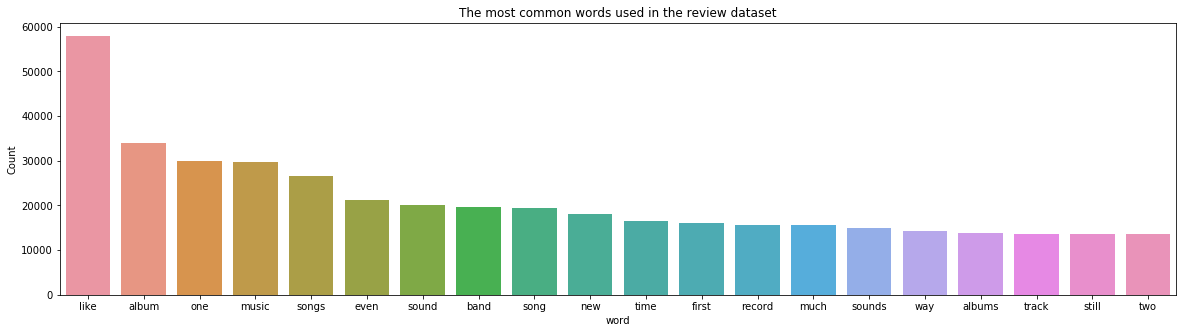

In [39]:
def plot_freq_words(words, title,terms = 20):

    fdist = FreqDist(words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.title(title)
    plt.show()
all_music_words=[]
for word in processed_keywords:
    all_music_words.extend(word) 
plot_freq_words(all_music_words,'The most common words used in the review dataset')

Besides common words like 'like', 'album','music', 'song', 'band', 'track', 'even', 'new' or 'sound', what is the most common word used with respect to each genre?

In [40]:
for genre in genres:
    df_extracted_reviews = df_reviews[df_reviews['genre'] == genre]
    extracted_keywords = []
    for keywords in df_extracted_reviews['key_words']:
        for keyword in keywords:
            if (keyword != 'like') & (keyword != 'album') & (keyword != 'music') & (keyword !='songs') & (keyword != 'one') & (keyword != 'song') & (keyword != 'sound') & (keyword != 'band') & (keyword != 'one') & (keyword != 'new') & (keyword != 'even') & (keyword != 'bands') & (keyword != 'tracks') & (keyword != 'sounds') & (keyword != 'track'):
                extracted_keywords.append(keyword)
    fdist = FreqDist(extracted_keywords)
    
    appear_times = list(fdist.values())
    appear_keys = list(fdist.keys())
    print('The word \''+appear_keys[appear_times.index(np.max(appear_times))]+'\' is often used in describing '+genre+'.')

The word 'time' is often used in describing Rock.
The word 'way' is often used in describing Electronic.
The word 'rap' is often used in describing Rap.
The word 'work' is often used in describing Experimental.
The word 'pop' is often used in describing Pop/R&B.
The word 'guitar' is often used in describing Folk/Country.
The word 'metal' is often used in describing Metal.
The word 'pop' is often used in describing Rock,Pop/R&B.
The word 'jazz' is often used in describing Jazz.
The word 'godspeed' is often used in describing Rock,Experimental.
The word 'metal' is often used in describing Metal,Rock.
The word 'jazz' is often used in describing Jazz,Experimental.
The word 'tillmans' is often used in describing Experimental,Electronic.
The word 'cooper' is often used in describing Folk/Country,Experimental.
The word 'guitar' is often used in describing Experimental,Rock.
The word 'guitar' is often used in describing Global.
The word 'voice' is often used in describing Pop/R&B,Electronic.
T

The word 'halloatesiii' is often used in describing Electronic,Experimental,Rap.
The word 'bus' is often used in describing Rap,Electronic,Jazz.
The word 'spooky' is often used in describing Electronic,Jazz,Metal.


That is very interesting! (e.g, 'godspeed' for Rock, 'ghostface' for 'Rap, Jazz')

### What adjectives do people often use to describe Pop/R&B?

Let's take a look at just one genre: Electronic, Pop/R&B and focus on what adjectives people usually use to desribe this genre.

In [41]:
df_reviews_extracted = df_reviews[df_reviews['genre'] == 'Pop/R&B']
df_reviews_extracted['tag_of_words'] = df_reviews_extracted['key_words'].apply(pos_tag)
adjectives_list = []
for i in range(len(df_reviews_extracted)):
    adjectives = []
    for key,value in df_reviews_extracted['tag_of_words'].iloc[i]:
        if (value == 'JJ'): # Extract adjectives
            adjectives.append(key)
    adjectives_list.append(adjectives)
df_reviews_extracted['adjectives'] = adjectives_list
df_reviews_extracted['adjectives'].head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



8     [much, rb, rap, rb, soulful, selfish, longtime...
16    [musical, public, general, particular, counter...
30    [onefifth, british, second, seraphic, close, r...
43    [multimilliondollar, multigenerational, chic, ...
55    [hot, def, prefab, fresh, escaped, massive, br...
Name: adjectives, dtype: object

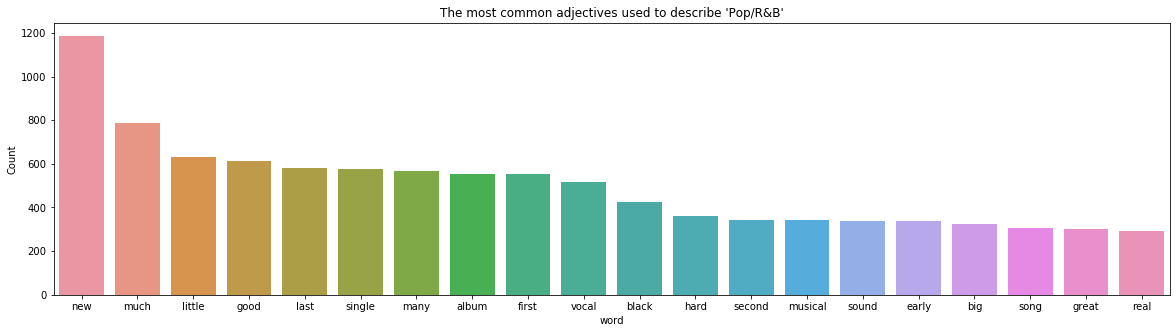

In [42]:
# Processing Keywords
processed_keywords=[]
for keywords in df_reviews_extracted['adjectives']:
    processed_keywords.append(keywords)
all_music_words=[]
for word in processed_keywords:
    all_music_words.extend(word) 
plot_freq_words(all_music_words,'The most common adjectives used to describe \'Pop/R&B\'')

### Using reviews to achieve music recommendation

In [43]:
df_reviews_extracted = df_reviews[df_reviews['genre'] == 'Pop/R&B']

# Processing Keywords
processed_keywords=[]
for keywords in df_reviews_extracted['key_words']:
    processed_keywords.append(keywords)
dictionary = Dictionary(processed_keywords)
corpus = [dictionary.doc2bow(keywords) for keywords in processed_keywords]

Reputation produced by Taylor Swift is the album that we are going to use to find similar albums.

In [44]:
df_reviews[df_reviews['artist'] == 'Taylor Swift']

artist       album    genre  score              date  \
1360  Taylor Swift  Reputation  Pop/R&B    6.5  November 13 2017   

            author         role  \
1360  Jamieson Cox  Contributor   

                                                 review  \
1360  For a decade, almost everyone agreed on Taylor...   

                                              key_words  
1360  [decade, almost, everyone, agreed, taylor, swi...

In [45]:
# Create the tf-idf model for the corpus created above 
tfidf = TfidfModel(corpus)
# Create the similarity data structure. 
# This is the most important part where we get the similarities between the musics.
# Hint: use the length of the dictionary as the num_features
sims = MatrixSimilarity(tfidf[corpus],num_features = len(dictionary))

def music_recommendation(music_title, dictionary, number_of_hits=10):
    top_words = 10
    
    musics = df_reviews_extracted
    # We will first start bygetting all the keywords related to the musics
    music = musics.loc[musics['album']==music_title] # get the music row
    keywords = music['key_words']# Get all the keywords
    
    doc=[]
    for word in keywords:
        doc.extend(word)
    # Convert the doc into it's equivalent bag of words
    query_doc_bow = dictionary.doc2bow(doc)

    # convert the regular bag of words model to a tf-idf model where we have tuples
    # of the music ID and its tf-idf value for the music
    query_doc_tfidf = tfidf[query_doc_bow]

    # get the array of similarity values between our music and every other music. 
    # To do this, we pass our list of tf-idf tuples to sims.
    similarity_array = sims[query_doc_tfidf] 
    # the length is the number of musics we have. 
    
    similarity_series = pd.Series(similarity_array.tolist(), index=musics['album'].values) #Convert to a Series
    top_hits = similarity_series.sort_values(ascending=False)[1:number_of_hits+1] 
    #get the top matching results, i.e. most similar musics; 
    # start from index 1 because every music is most similar to itself

    #print the words with the highest tf-idf values for the provided music:
    
    sorted_tfidf_weights = sorted(tfidf[corpus[min(len(corpus)-1,music.index.values.tolist()[0])]], key=lambda w: w[1], reverse=True)
    print('Top %s words associated with this album by tf-idf are: ' % top_words)
    for term_id, weight in sorted_tfidf_weights[:top_words]:
        print(" '%s' (tf-idf score = %.3f)" %(dictionary.get(term_id), weight))
    print("\n")
    
    # Print the top matching albums
    print("Top %s most similar albums for album %s are:" %(number_of_hits, music_title))
    top_musics=[]
    for idx, (music,score) in enumerate(zip(top_hits.index, top_hits)):
        print("%d %s produced by %s (similarity score = %.3f)" %(idx+1, music, musics[musics['album'] == music]['artist'].values[0],score))
        top_musics.append(music)
    return top_musics

top_10_musics = music_recommendation("Reputation", dictionary)

Top 10 words associated with this album by tf-idf are: 
 'broken' (tf-idf score = 0.243)
 'west' (tf-idf score = 0.174)
 'heaven' (tf-idf score = 0.150)
 'blitheness' (tf-idf score = 0.109)
 'elm' (tf-idf score = 0.109)
 'encouragingly' (tf-idf score = 0.109)
 'highhatriding' (tf-idf score = 0.109)
 'hurtles' (tf-idf score = 0.109)
 'incongruently' (tf-idf score = 0.109)
 'peevishness' (tf-idf score = 0.109)


Top 10 most similar albums for album Reputation are:
1 Gone Now produced by Bleachers (similarity score = 0.081)
2 Witness produced by Katy Perry (similarity score = 0.065)
3 Love Remains produced by How to Dress Well (similarity score = 0.064)
4 The Rite of May EP produced by Oklou (similarity score = 0.060)
5 Daydream produced by Mariah Carey (similarity score = 0.059)
6 25 produced by Adele (similarity score = 0.057)
7 Devotion produced by Laura Jean (similarity score = 0.057)
8 Know It All produced by Alessia Cara (similarity score = 0.056)
9 Kindred produced by Passion Pit (

In [46]:
# These lines help load your submission for grading.
from client.api.notebook import Notebook
ok = Notebook('final-project.ok')
_ = ok.auth(inline=True)

Assignment: final-project
OK, version v1.14.15

Successfully logged in as zilongliu@ucsb.edu


In [ ]:
_ = ok.submit()